#### Import packages and dataset

In [1]:
import pandas as pd
import numpy as np
import glob
import seaborn as sns                 
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
import statsmodels.api as sm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
folder_path = '../data'
glob.glob(folder_path + '*.csv')

['../data/raw/tokenized_access_logs.csv',
 '../data/raw/future_data.csv',
 '../data/raw/DataCoSupplyChainDataset.csv',
 '../data/raw/DataCo_cleaned.csv',
 '../data/raw/Q1_2015.csv',
 '../data/raw/DescriptionDataCoSupplyChain.csv']

In [3]:
logs_df = pd.read_csv(folder_path + 'tokenized_access_logs.csv')
df = pd.read_csv(folder_path + 'DataCoSupplyChainDataset.csv', encoding='ISO-8859-1')
description_df = pd.read_csv(folder_path + 'DescriptionDataCoSupplyChain.csv')

#### See the Structures of the Datasets

In [4]:
logs_df.head(10)

Product             Category  \
0        adidas Brazuca 2017 Official Match Ball  baseball & softball   
1          The North Face Women's Recon Backpack   hunting & shooting   
2         adidas Kids' RG III Mid Football Cleat       featured shops   
3     Under Armour Men's Compression EV SL Slide          electronics   
4                    Pelican Sunstream 100 Kayak         water sports   
5     Team Golf Tennessee Volunteers Putter Grip          accessories   
6          The North Face Women's Recon Backpack   hunting & shooting   
7  Diamondback Boys' Insight 24 Performance Hybr           basketball   
8           Nike Men's Dri-FIT Victory Golf Polo      women's apparel   
9         adidas Kids' RG III Mid Football Cleat       featured shops   

            Date Month  Hour Department              ip  \
0  9/1/2017 6:00   Sep     6   fitness     37.97.182.65   
1  9/1/2017 6:00   Sep     6  fan shop     206.56.112.1   
2  9/1/2017 6:00   Sep     6   apparel    215.143.180.0   
3  9/1/2017 6:00   Sep     6  footwear     206.56.112.1   
4  9/1/2017 6:01   Sep     6  fan shop   136.108.56.242   
5  9/1/2017 6:02   Sep     6  outdoors   116.202.25.156   
6  9/1/2017 6:02   Sep     6  fan shop   131.132.236.70   
7  9/1/2017 6:02   Sep     6   fitness   30.175.101.147   
8  9/1/2017 6:03   Sep     6      golf     206.56.112.1   
9  9/1/2017 6:03   Sep     6   apparel    171.218.47.35   

                                                 url  
0  /department/fitness/category/baseball%20&%20so...  
1  /department/fan%20shop/category/hunting%20&%20...  
2  /department/apparel/category/featured%20shops/...  
3  /department/footwear/category/electronics/prod...  
4  /department/fan%20shop/category/water%20sports...  
5  /department/outdoors/category/accessories/prod...  
6  /department/fan%20shop/category/hunting%20&%20...  
7  /department/fitness/category/basketball/produc...  
8  /department/golf/category/women's%20apparel/pr...  
9  /department/apparel/category/featured%20shops/...

In [5]:
# customer + payment related data
df.iloc[:, :20].head(10)

Type  Days for shipping (real)  Days for shipment (scheduled)  \
0     DEBIT                         3                              4   
1  TRANSFER                         5                              4   
2      CASH                         4                              4   
3     DEBIT                         3                              4   
4   PAYMENT                         2                              4   
5  TRANSFER                         6                              4   
6     DEBIT                         2                              1   
7  TRANSFER                         2                              1   
8      CASH                         3                              2   
9      CASH                         2                              1   

   Benefit per order  Sales per customer    Delivery Status  \
0          91.250000          314.640015   Advance shipping   
1        -249.089996          311.359985      Late delivery   
2        -247.779999          309.720001   Shipping on time   
3          22.860001          304.809998   Advance shipping   
4         134.210007          298.250000   Advance shipping   
5          18.580000          294.980011  Shipping canceled   
6          95.180000          288.420013      Late delivery   
7          68.430000          285.140015      Late delivery   
8         133.720001          278.589996      Late delivery   
9         132.149994          275.309998      Late delivery   

   Late_delivery_risk  Category Id   Category Name Customer City  \
0                   0           73  Sporting Goods        Caguas   
1                   1           73  Sporting Goods        Caguas   
2                   0           73  Sporting Goods      San Jose   
3                   0           73  Sporting Goods   Los Angeles   
4                   0           73  Sporting Goods        Caguas   
5                   0           73  Sporting Goods     Tonawanda   
6                   1           73  Sporting Goods        Caguas   
7                   1           73  Sporting Goods         Miami   
8                   1           73  Sporting Goods        Caguas   
9                   1           73  Sporting Goods     San Ramon   

  Customer Country Customer Email Customer Fname  Customer Id Customer Lname  \
0      Puerto Rico      XXXXXXXXX          Cally        20755       Holloway   
1      Puerto Rico      XXXXXXXXX          Irene        19492           Luna   
2          EE. UU.      XXXXXXXXX        Gillian        19491      Maldonado   
3          EE. UU.      XXXXXXXXX           Tana        19490           Tate   
4      Puerto Rico      XXXXXXXXX           Orli        19489      Hendricks   
5          EE. UU.      XXXXXXXXX       Kimberly        19488        Flowers   
6      Puerto Rico      XXXXXXXXX      Constance        19487        Terrell   
7          EE. UU.      XXXXXXXXX          Erica        19486        Stevens   
8      Puerto Rico      XXXXXXXXX        Nichole        19485          Olsen   
9          EE. UU.      XXXXXXXXX          Oprah        19484       Delacruz   

  Customer Password Customer Segment Customer State           Customer Street  \
0         XXXXXXXXX         Consumer             PR  5365 Noble Nectar Island   
1         XXXXXXXXX         Consumer             PR          2679 Rustic Loop   
2         XXXXXXXXX         Consumer             CA      8510 Round Bear Gate   
3         XXXXXXXXX      Home Office             CA           3200 Amber Bend   
4         XXXXXXXXX        Corporate             PR  8671 Iron Anchor Corners   
5         XXXXXXXXX         Consumer             NY          2122 Hazy Corner   
6         XXXXXXXXX      Home Office             PR      1879 Green Pine Bank   
7         XXXXXXXXX        Corporate             FL       7595 Cotton Log Row   
8         XXXXXXXXX        Corporate             PR          2051 Dusty Route   
9         XXXXXXXXX        Corporate             CA   9139 Blue Blossom Court   

In [6]:
# order related data
df.iloc[:, 21:40].head(10)

Department Name   Latitude   Longitude        Market  Order City  \
0         Fitness  18.251453  -66.037056  Pacific Asia      Bekasi   
1         Fitness  18.279451  -66.037064  Pacific Asia     Bikaner   
2         Fitness  37.292233 -121.881279  Pacific Asia     Bikaner   
3         Fitness  34.125946 -118.291016  Pacific Asia  Townsville   
4         Fitness  18.253769  -66.037048  Pacific Asia  Townsville   
5         Fitness  43.013969  -78.879066  Pacific Asia   Toowoomba   
6         Fitness  18.242538  -66.037056  Pacific Asia   Guangzhou   
7         Fitness  25.928869  -80.162872  Pacific Asia   Guangzhou   
8         Fitness  18.233223  -66.037056  Pacific Asia   Guangzhou   
9         Fitness  37.773991 -121.966629  Pacific Asia   Guangzhou   

  Order Country  Order Customer Id order date (DateOrders)  Order Id  \
0     Indonesia              20755         1/31/2018 22:56     77202   
1         India              19492         1/13/2018 12:27     75939   
2         India              19491         1/13/2018 12:06     75938   
3     Australia              19490         1/13/2018 11:45     75937   
4     Australia              19489         1/13/2018 11:24     75936   
5     Australia              19488         1/13/2018 11:03     75935   
6         China              19487         1/13/2018 10:42     75934   
7         China              19486         1/13/2018 10:21     75933   
8         China              19485         1/13/2018 10:00     75932   
9         China              19484          1/13/2018 9:39     75931   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                    1360            13.110000                      0.04   
1                    1360            16.389999                      0.05   
2                    1360            18.030001                      0.06   
3                    1360            22.940001                      0.07   
4                    1360            29.500000                      0.09   
5                    1360            32.779999                      0.10   
6                    1360            39.330002                      0.12   
7                    1360            42.610001                      0.13   
8                    1360            49.160000                      0.15   
9                    1360            52.439999                      0.16   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0         180517                    327.75                     0.29   
1         179254                    327.75                    -0.80   
2         179253                    327.75                    -0.80   
3         179252                    327.75                     0.08   
4         179251                    327.75                     0.45   
5         179250                    327.75                     0.06   
6         179249                    327.75                     0.33   
7         179248                    327.75                     0.24   
8         179247                    327.75                     0.48   
9         179246                    327.75                     0.48   

   Order Item Quantity   Sales  Order Item Total  Order Profit Per Order  
0                    1  327.75        314.640015               91.250000  
1                    1  327.75        311.359985             -249.089996  
2                    1  327.75        309.720001             -247.779999  
3                    1  327.75        304.809998               22.860001  
4                    1  327.75        298.250000              134.210007  
5                    1  327.75        294.980011               18.580000  
6                    1  327.75        288.420013               95.180000  
7                    1  327.75        285.140015               68.430000  
8                    1  327.75        278.589996              133.720001  
9                    1  327.75        275.309998              132.149

In [7]:
# order related data - continue
df.iloc[:, 41:].head(10)

Order State     Order Status  Order Zipcode  Product Card Id  \
0  Java Occidental         COMPLETE            NaN             1360   
1         Rajastán          PENDING            NaN             1360   
2         Rajastán           CLOSED            NaN             1360   
3       Queensland         COMPLETE            NaN             1360   
4       Queensland  PENDING_PAYMENT            NaN             1360   
5       Queensland         CANCELED            NaN             1360   
6        Guangdong         COMPLETE            NaN             1360   
7        Guangdong       PROCESSING            NaN             1360   
8        Guangdong           CLOSED            NaN             1360   
9        Guangdong           CLOSED            NaN             1360   

   Product Category Id  Product Description  \
0                   73                  NaN   
1                   73                  NaN   
2                   73                  NaN   
3                   73                  NaN   
4                   73                  NaN   
5                   73                  NaN   
6                   73                  NaN   
7                   73                  NaN   
8                   73                  NaN   
9                   73                  NaN   

                                  Product Image  Product Name  Product Price  \
0  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
1  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
2  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
3  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
4  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
5  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
6  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
7  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
8  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   
9  http://images.acmesports.sports/Smart+watch   Smart watch          327.75   

   Product Status shipping date (DateOrders)   Shipping Mode  
0               0             2/3/2018 22:56  Standard Class  
1               0            1/18/2018 12:27  Standard Class  
2               0            1/17/2018 12:06  Standard Class  
3               0            1/16/2018 11:45  Standard Class  
4               0            1/15/2018 11:24  Standard Class  
5               0            1/19/2018 11:03  Standard Class  
6               0            1/15/2018 10:42     First Class  
7               0            1/15/2018 10:21     First Class  
8               0            1/16/2018 10:00    Second Class  
9               0             1/15/2018 9:39     First Class

In [8]:
description_df # Description for columns in the supply_chain_df

FIELDS  \
0                            Type   
1   Days for shipping (real)        
2   Days for shipment (scheduled)   
3               Benefit per order   
4              Sales per customer   
5                 Delivery Status   
6   Late_delivery_risk              
7                     Category Id   
8                   Category Name   
9                   Customer City   
10               Customer Country   
11                 Customer Email   
12                 Customer Fname   
13                    Customer Id   
14                 Customer Lname   
15              Customer Password   
16               Customer Segment   
17                 Customer State   
18                Customer Street   
19               Customer Zipcode   
20                  Department Id   
21                Department Name   
22                       Latitude   
23                      Longitude   
24                         Market   
25                     Order City   
26                  Order Country   
27              Order Customer Id   
28        order date (DateOrders)   
29                       Order Id   
30         Order Item Cardprod Id   
31            Order Item Discount   
32  Order Item Discount Rate        
33                  Order Item Id   
34  Order Item Product Price        
35        Order Item Profit Ratio   
36            Order Item Quantity   
37                          Sales   
38             Order Item Total     
39         Order Profit Per Order   
40                   Order Region   
41                    Order State   
42                   Order Status   
43                Product Card Id   
44            Product Category Id   
45            Product Description   
46                  Product Image   
47                   Product Name   
48                  Product Price   
49                 Product Status   
50  Shipping date (DateOrders)      
51                  Shipping Mode   

                                          DESCRIPTION  
0                         :  Type of transaction made  
1    :  Actual shipping days of the purchased product  
2   :  Days of scheduled delivery of the purchased...  
3                        :  Earnings per order placed  
4       :  Total sales per customer made per customer  
5   :  Delivery status of orders: Advance shipping...  
6   :  Categorical variable that indicates if send...  
7                            :  Product category code  
8              :  Description of the product category  
9        :  City where the customer made the purchase  
10    :  Country where the customer made the purchase  
11                                :  Customer's email  
12                                   :  Customer name  
13                                     :  Customer ID  
14                               :  Customer lastname  
15                             :  Masked customer key  
16  :  Types of Customers: Consumer , Corporate , ...  
17  :  State to which the store where the purchase...  
18  :  Street to which the store where the purchas...  
19                                :  Customer Zipcode  
20                        :  Department code of store  
21                        :  Department name of store  
22     :  Latitude corresponding to location of store  
23    :  Longitude corresponding to location of store  
24  :  Market to where the order is delivered : Af...  
25                   :  Destination city of the order  
26                :  Destination country of the order  
27                             :  Customer order code  
28                 :  Date on which the order is made  
29                                      :  Order code  
30  :  Product code generated through the RFID reader  
31                       :  Order item discount value  
32                  :  Order item discount percentage  
33                                 :  Order item code  
34              :  Price of products without discount  
35                         :  Order Item Profit R

In [9]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519 non-null  object 
 12  Customer Fname                

In [10]:
# Check for Missing Values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values

Product Description    180519
Order Zipcode          155679
Customer Lname              8
Customer Zipcode            3
dtype: int64

In [11]:
df = df.drop(columns=['Product Description', 'Customer Email', 'Product Image', 'Customer Password'])

In [12]:
df['Customer Lname'] = df['Customer Lname'].fillna('Unknown')
df['Customer Zipcode'] = df['Customer Zipcode'].fillna('Unknown')


In [13]:
df['order date (DateOrders)'] = pd.to_datetime(df['order date (DateOrders)'], errors='coerce')
df['shipping date (DateOrders)'] = pd.to_datetime(df['shipping date (DateOrders)'], errors='coerce')


In [14]:
df['Year'] = df['order date (DateOrders)'].dt.year
df['Month'] = df['order date (DateOrders)'].dt.month
df['YearMonth'] = df['order date (DateOrders)'].dt.strftime('%Y-%m')

In [15]:
df.describe()

Days for shipping (real)  Days for shipment (scheduled)  \
count             180519.000000                  180519.000000   
mean                   3.497654                       2.931847   
min                    0.000000                       0.000000   
25%                    2.000000                       2.000000   
50%                    3.000000                       4.000000   
75%                    5.000000                       4.000000   
max                    6.000000                       4.000000   
std                    1.623722                       1.374449   

       Benefit per order  Sales per customer  Late_delivery_risk  \
count      180519.000000       180519.000000       180519.000000   
mean           21.974989          183.107609            0.548291   
min         -4274.979980            7.490000            0.000000   
25%             7.000000          104.379997            0.000000   
50%            31.520000          163.990005            1.000000   
75%            64.800003          247.399994            1.000000   
max           911.799988         1939.989990            1.000000   
std           104.433526          120.043670            0.497664   

         Category Id    Customer Id  Department Id       Latitude  \
count  180519.000000  180519.000000  180519.000000  180519.000000   
mean       31.851451    6691.379495       5.443460      29.719955   
min         2.000000       1.000000       2.000000     -33.937553   
25%        18.000000    3258.500000       4.000000      18.265432   
50%        29.000000    6457.000000       5.000000      33.144863   
75%        45.000000    9779.000000       7.000000      39.279617   
max        76.000000   20757.000000      12.000000      48.781933   
std        15.640064    4162.918106       1.629246       9.813646   

           Longitude  ...  Order Item Total Order Profit Per Order  \
count  180519.000000  ...     180519.000000          180519.000000   
mean      -84.915675  ...        183.107609              21.974989   
min      -158.025986  ...          7.490000           -4274.979980   
25%       -98.446312  ...        104.379997               7.000000   
50%       -76.847908  ...        163.990005              31.520000   
75%       -66.370583  ...        247.399994              64.800003   
max       115.263077  ...       1939.989990             911.799988   
std        21.433241  ...        120.043670             104.433526   

       Order Zipcode  Product Card Id  Product Category Id  Product Price  \
count   24840.000000    180519.000000        180519.000000  180519.000000   
mean    55426.132327       692.509764            31.851451     141.232550   
min      1040.000000        19.000000             2.000000       9.990000   
25%     23464.000000       403.000000            18.000000      50.000000   
50%     59405.000000       627.000000            29.000000      59.990002   
75%     90008.000000      1004.000000            45.000000     199.990005   
max     99301.000000      1363.000000            76.000000    1999.989990   
std     31919.279101       336.446807            15.640064     139.732492   

       Product Status     shipping date (DateOrders)           Year  \
count        180519.0                         180519  180519.000000   
mean              0.0  2016-06-16 05:45:23.202433024    2015.971150   
min               0.0            2015-01-03 00:00:00    2015.000000   
25%               0.0            2015-09-25 06:59:00    2015.000000   
50%               0.0            2016-06-15 08:32:00    2016.000000   
75%               0.0            2017-03-04 21:29:00    2017.000000   
max               0.0            2018-02-06 22:14:00    2018.000000   
std               0.0                            NaN       0.829429   

               Month  
count  180519.000000  
mean        6.235449  
min         1.000000  
25%         3.000000  
50%         6.000000  
75%         9.000000  
max        12.000000  
std         3.403571  

[8 r

In [16]:
df.to_csv(folder_path + 'DataCo_cleaned.csv', index = False) # Save the cleaned df to csv

#### Numerical Features Analysis

Unique Values - Customers, Orders, Products

In [17]:
unique_count_customer = df['Customer Id'].nunique(dropna=False)
print(f'There are {unique_count_customer} unique customers.')

unique_count_orderid = df['Order Id'].nunique(dropna=False)
print(f'There are {unique_count_orderid} unique orders.')

unique_count_pid = df['Product Card Id'].nunique(dropna=False)
print(f'There are {unique_count_pid} unique products.')

There are 20652 unique customers.
There are 65752 unique orders.
There are 118 unique products.


Numerical Value Distributions

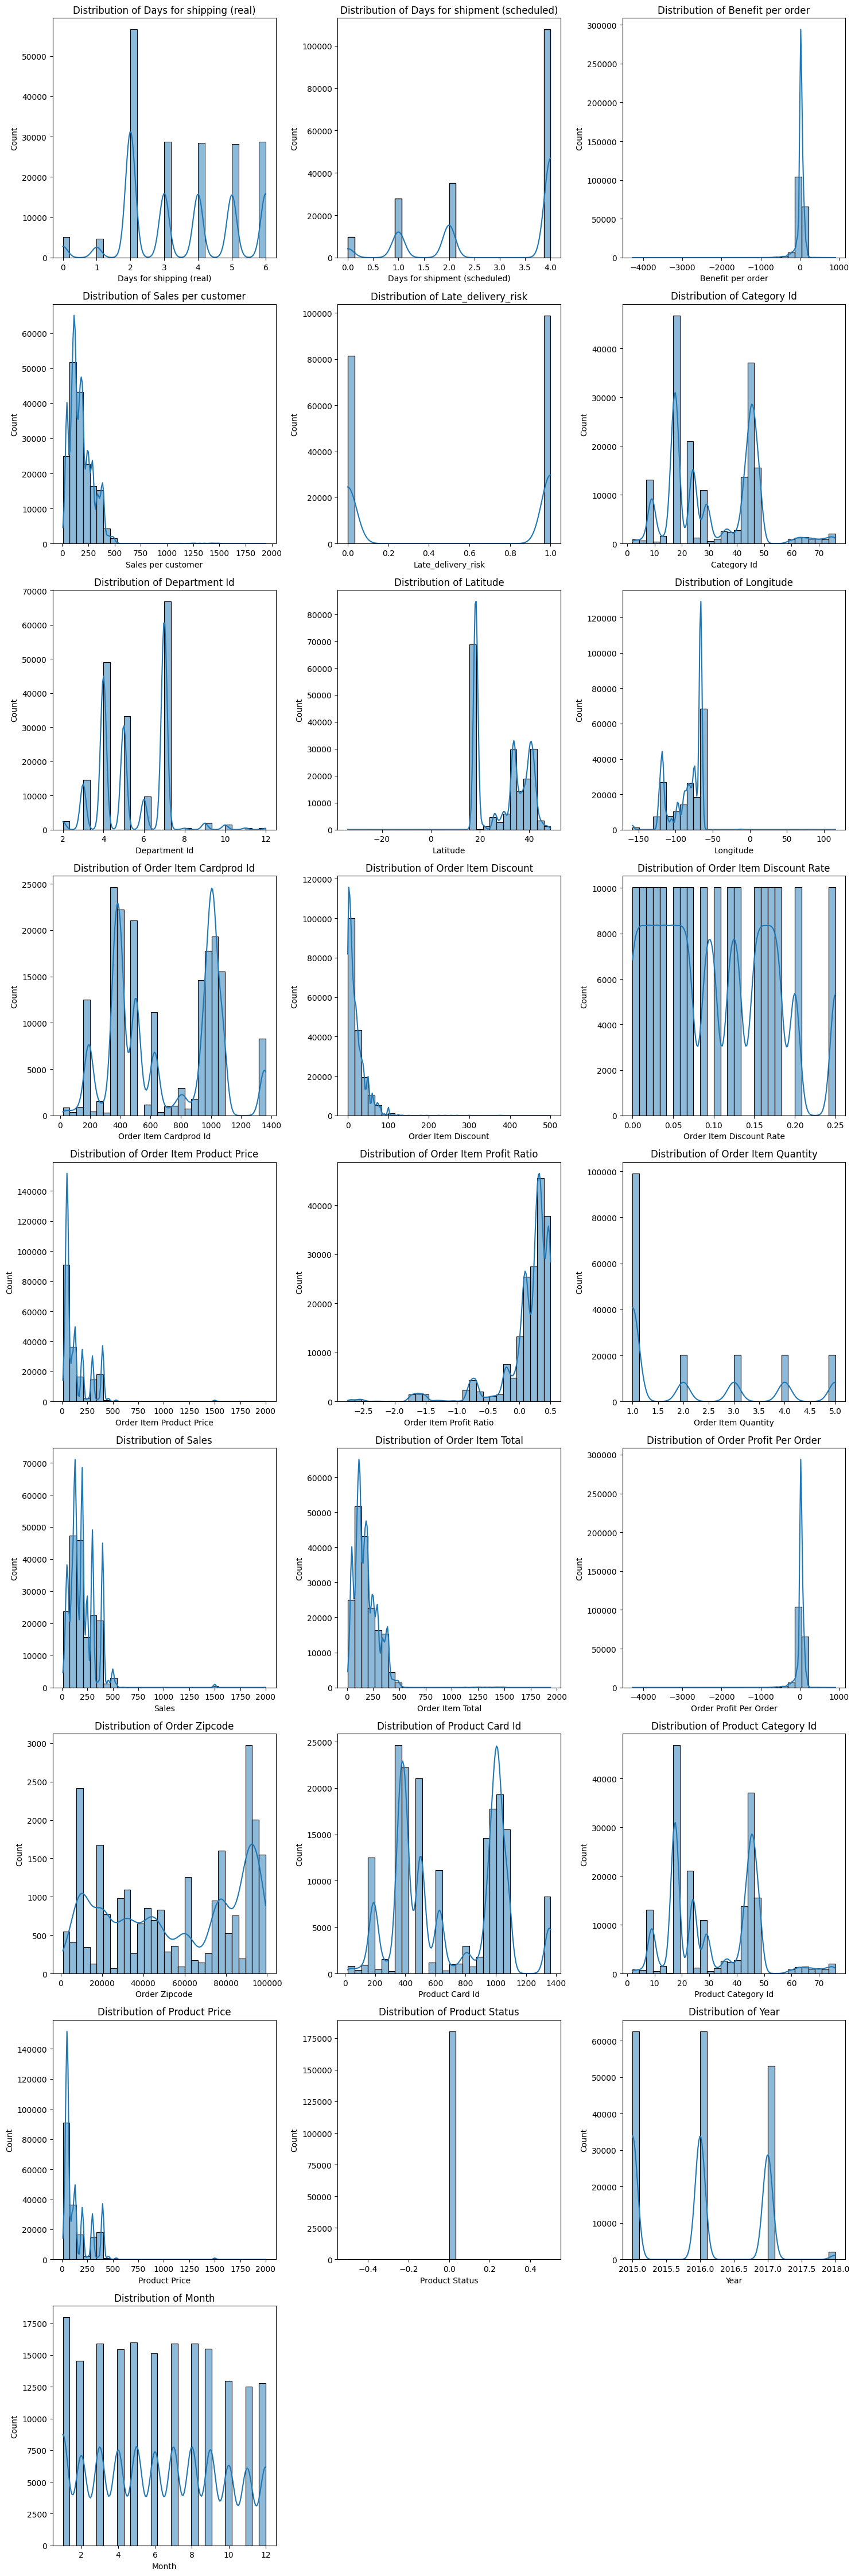

In [18]:
numerical_data = df.select_dtypes(include=[np.number]).drop(columns=['Order Id', 'Order Customer Id',
                                                                    'Customer Id', 'Order Item Id'])

num_cols = numerical_data.shape[1]
n_rows = (num_cols // 3) + (num_cols % 3 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(numerical_data.columns):
    plt.subplot(n_rows, 3, idx + 1)
    sns.histplot(numerical_data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

Unique Years Across the Dataset

In [19]:
# All unique year values
df['Year'] = df['order date (DateOrders)'].dt.year
unique_years = df['Year'].unique()

df['ShippingYear'] = df['shipping date (DateOrders)'].dt.year
unique_shipping_years = df['ShippingYear'].unique()

print(f'The unique years in the order data are: {unique_years}')
print(f'The unique years in the shipping data are: {unique_shipping_years}')

# Find the earliest year
earliest_order_date = df['order date (DateOrders)'].dt.date.min()
latest_order_date = df['order date (DateOrders)'].dt.date.max()

earliest_ship_date = df['shipping date (DateOrders)'].dt.date.min()
latest_ship_date = df['shipping date (DateOrders)'].dt.date.max()

print(f'The earliest order date in the data is: {earliest_order_date}')
print(f'The latest order date in the data is: {latest_order_date}')
print(f'The earliest shipping date in the data is: {earliest_ship_date}')
print(f'The latest shipping date in the data is: {latest_ship_date}')

The unique years in the order data are: [2018 2016 2015 2017]
The unique years in the shipping data are: [2018 2016 2017 2015]
The earliest order date in the data is: 2015-01-01
The latest order date in the data is: 2018-01-31
The earliest shipping date in the data is: 2015-01-03
The latest shipping date in the data is: 2018-02-06


Order Count Over Time by Status

In [20]:
order_subset = df.iloc[:, 25:41]
order_subset['order_YearMonth'] = order_subset['order date (DateOrders)'].dt.strftime('%Y-%m')
order_subset

Order Customer Id order date (DateOrders)  Order Id  \
0                   20755     2018-01-31 22:56:00     77202   
1                   19492     2018-01-13 12:27:00     75939   
2                   19491     2018-01-13 12:06:00     75938   
3                   19490     2018-01-13 11:45:00     75937   
4                   19489     2018-01-13 11:24:00     75936   
...                   ...                     ...       ...   
180514               1005     2016-01-16 03:40:00     26043   
180515               9141     2016-01-16 01:34:00     26037   
180516                291     2016-01-15 21:00:00     26024   
180517               2813     2016-01-15 20:18:00     26022   
180518               7547     2016-01-15 18:54:00     26018   

        Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                         1360            13.110000                      0.04   
1                         1360            16.389999                      0.05   
2                         1360            18.030001                      0.06   
3                         1360            22.940001                      0.07   
4                         1360            29.500000                      0.09   
...                        ...                  ...                       ...   
180514                    1004             0.000000                      0.00   
180515                    1004             4.000000                      0.01   
180516                    1004             8.000000                      0.02   
180517                    1004            12.000000                      0.03   
180518                    1004            16.000000                      0.04   

        Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0              180517                327.750000                     0.29   
1              179254                327.750000                    -0.80   
2              179253                327.750000                    -0.80   
3              179252                327.750000                     0.08   
4              179251                327.750000                     0.45   
...               ...                       ...                      ...   
180514          65177                399.980011                     0.10   
180515          65161                399.980011                    -1.55   
180516          65129                399.980011                     0.36   
180517          65126                399.980011                     0.48   
180518          65113                399.980011                     0.44   

        Order Item Quantity       Sales  Order Item Total  \
0                         1  327.750000        314.640015   
1                         1  327.750000        311.359985   
2                         1  327.750000        309.720001   
3                         1  327.750000        304.809998   
4                         1  327.750000        298.250000   
...                     ...         ...               ...   
180514                    1  399.980011        399.980011   
180515                    1  399.980011        395.980011   
180516                    1  399.980011        391.980011   
180517                    1  399.980011        387.980011   
180518                    1  399.980011        383.980011   

        Order Profit Per Order    Order Region        Order State  \
0                    91.250000  Southeast Asia    Java Occidental   
1                  -249.089996      South Asia           Rajastán   
2                  -247.779999      South Asia           Rajastán   
3                    22.860001         Oceania         Queensland   
4                   134.210007         Oceania         Queensland   
...                        ...             ...                ...   
180514               40.000000    Eastern Asia           Shanghái   
180515             -613.770019    Eastern Asia              Osaka   
180516     

In [21]:
order_grouped = order_subset.groupby(["order_YearMonth", "Order Status"])["Order Item Id"].count().reset_index()
order_grouped = order_grouped.rename(columns = {"Order Item Id": "Order Counts"})
order_grouped

order_YearMonth     Order Status  Order Counts
0           2015-01         CANCELED            84
1           2015-01           CLOSED           560
2           2015-01         COMPLETE          1760
3           2015-01          ON_HOLD           270
4           2015-01   PAYMENT_REVIEW            50
..              ...              ...           ...
328         2018-01   PAYMENT_REVIEW            28
329         2018-01          PENDING           227
330         2018-01  PENDING_PAYMENT           451
331         2018-01       PROCESSING           252
332         2018-01  SUSPECTED_FRAUD            41

[333 rows x 3 columns]

In [22]:
fig = px.line(order_grouped, x = "order_YearMonth", y = "Order Counts", color = "Order Status",
              title = "Order Count Over Time by Status",
              labels = {"order_count": "Order Count", "order_YearMonth": "Order Date", "order_status": "Order Status"},
              markers = True)

fig.show()

Order Count Over Time

In [23]:
order_grouped2 = order_subset.groupby(["order_YearMonth"])["Order Item Id"].count().reset_index()
order_grouped2 = order_grouped2.rename(columns = {"Order Item Id": "Order Counts"})
order_grouped2.head()

order_YearMonth  Order Counts
0         2015-01          5322
1         2015-02          4729
2         2015-03          5362
3         2015-04          5126
4         2015-05          5357

In [24]:
fig = px.line(order_grouped2, x = "order_YearMonth", y = "Order Counts", title='Order Count Over Time', 
              markers=True)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Order Count',
    xaxis=dict(
        tickmode='auto',
        nticks=20,
        tickformat='%b %d, %Y'
    ),
    yaxis=dict(
        tickmode='auto',
        nticks=10
    )
)

fig.show()

Correlation Analysis

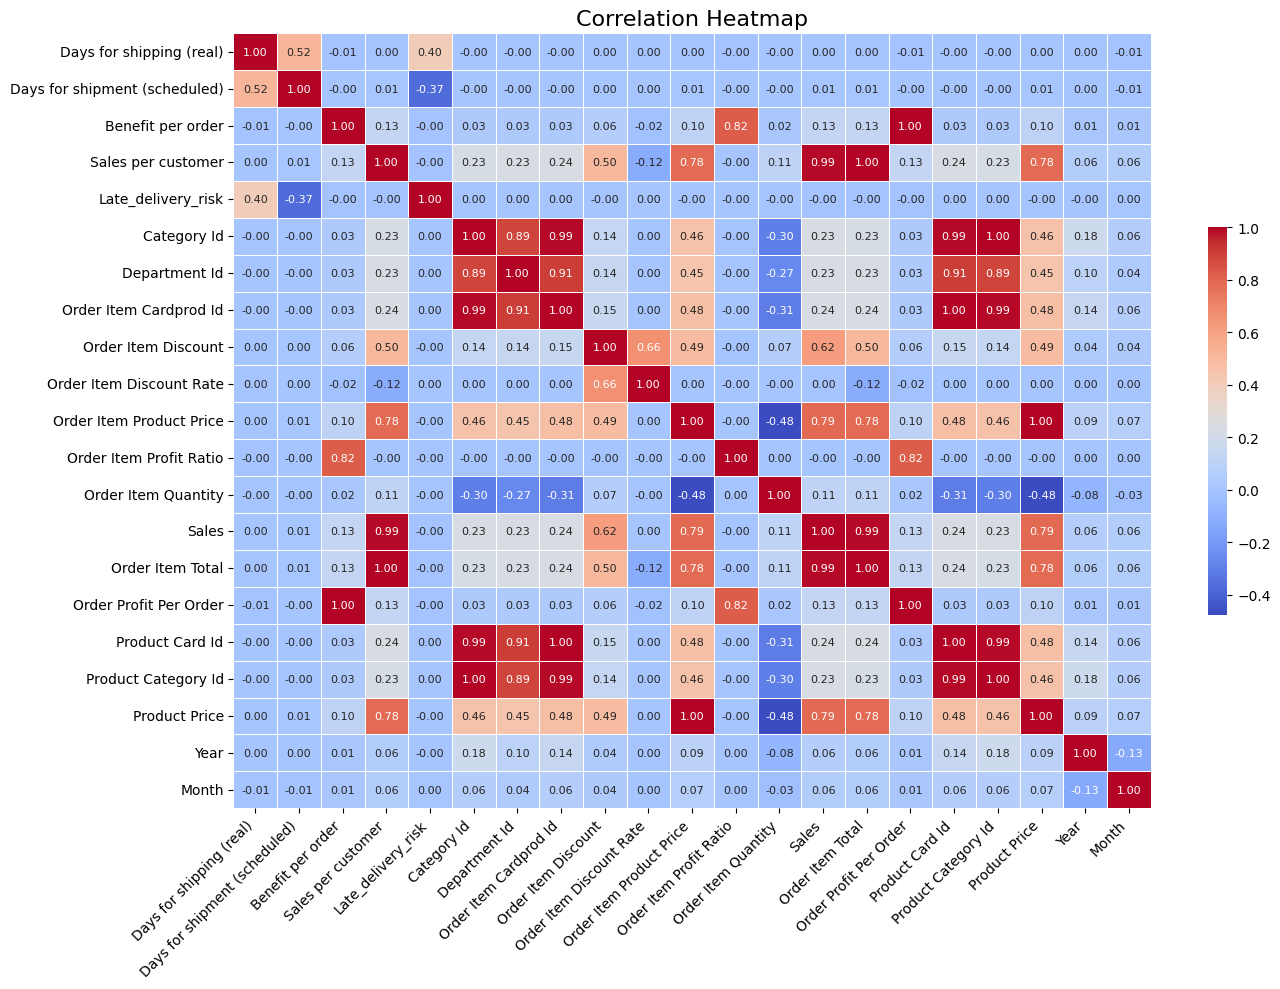

In [25]:
correlation_matrix = numerical_data.drop(columns=['Order Zipcode', 'Latitude', 'Longitude', 'Product Status']).corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            annot_kws={"size": 8}, 
            linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap', size=16)
plt.xticks(rotation=45, ha="right")  
plt.yticks(rotation=0)
plt.tight_layout()

Categorical Features Analysis

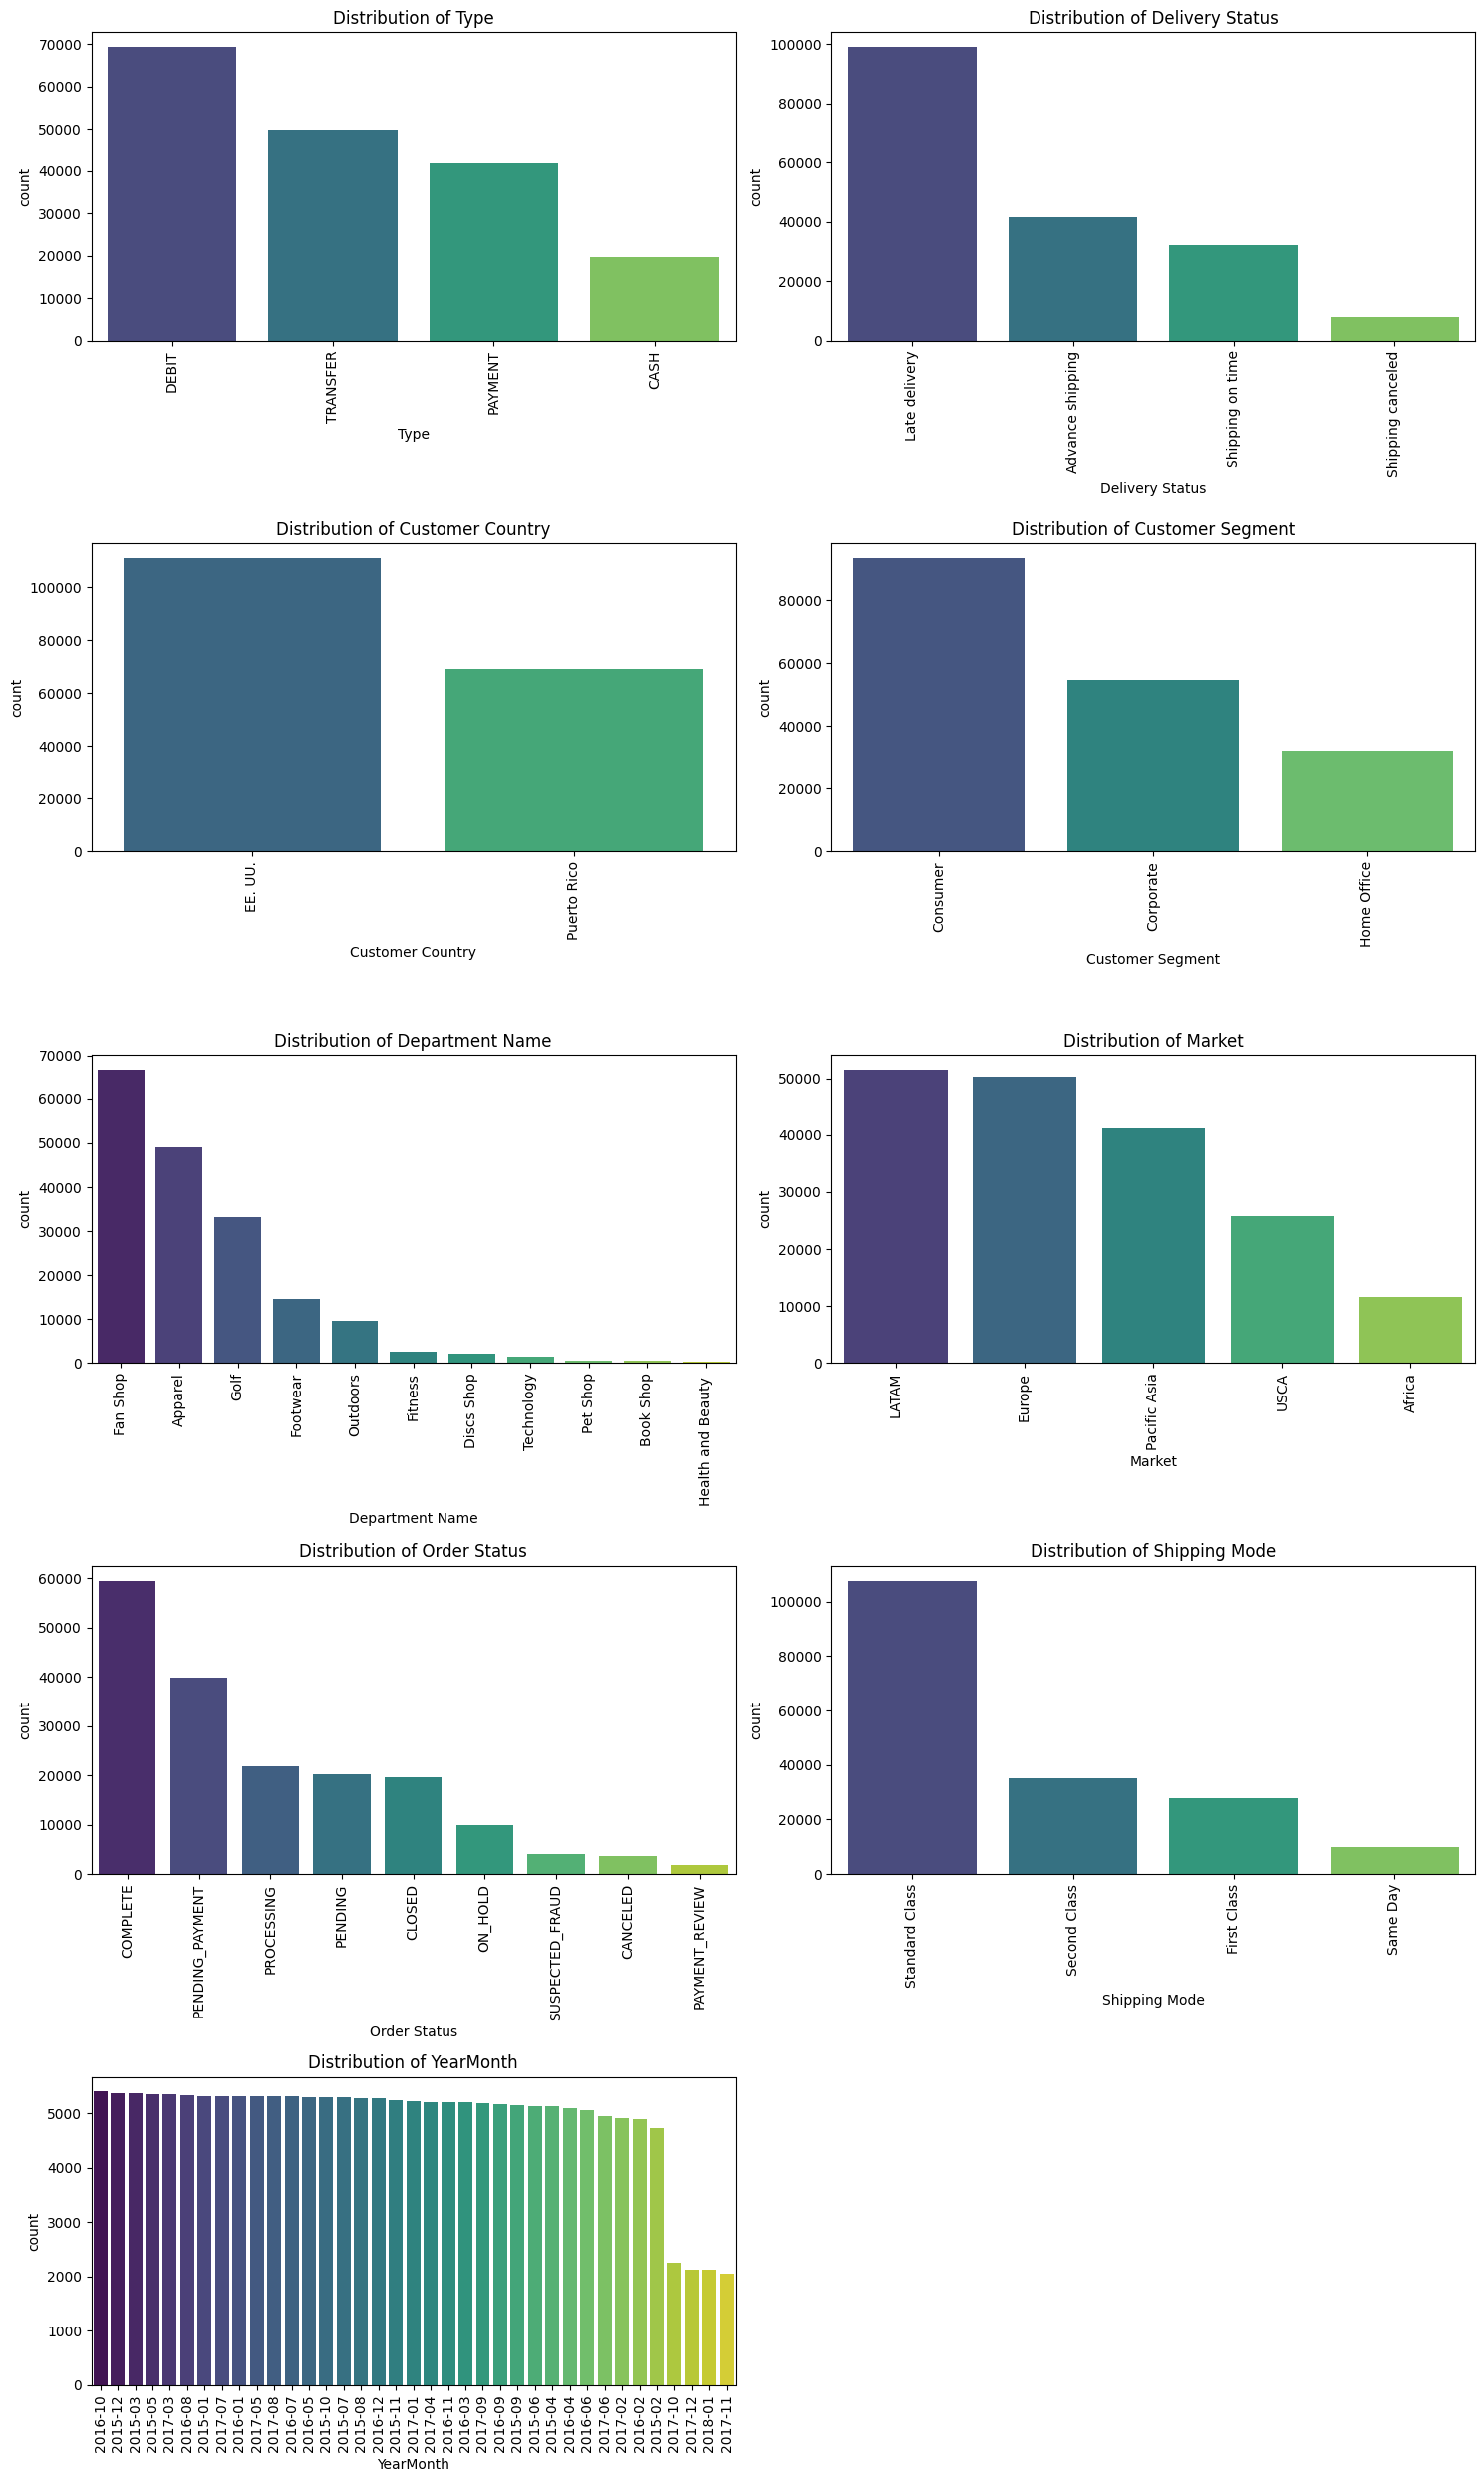

In [26]:
categorical_data = df.select_dtypes(include=['object']).drop(columns=['Customer City', 
                    'Customer Fname', 'Customer Lname', 'Customer Zipcode', 'Customer Street',
                    'Order City', 'Order State', 'Product Name', 'Category Name', 'Customer State', 
                    'Order Country', 'Order Region'])

num_cols = categorical_data.shape[1]
n_rows = (num_cols // 2) + (num_cols % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(categorical_data.columns):
    plt.subplot(n_rows, 2, idx + 1)
    sns.countplot(x=categorical_data[col], palette="viridis", order=categorical_data[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=90) 
    plt.tight_layout()

plt.show()

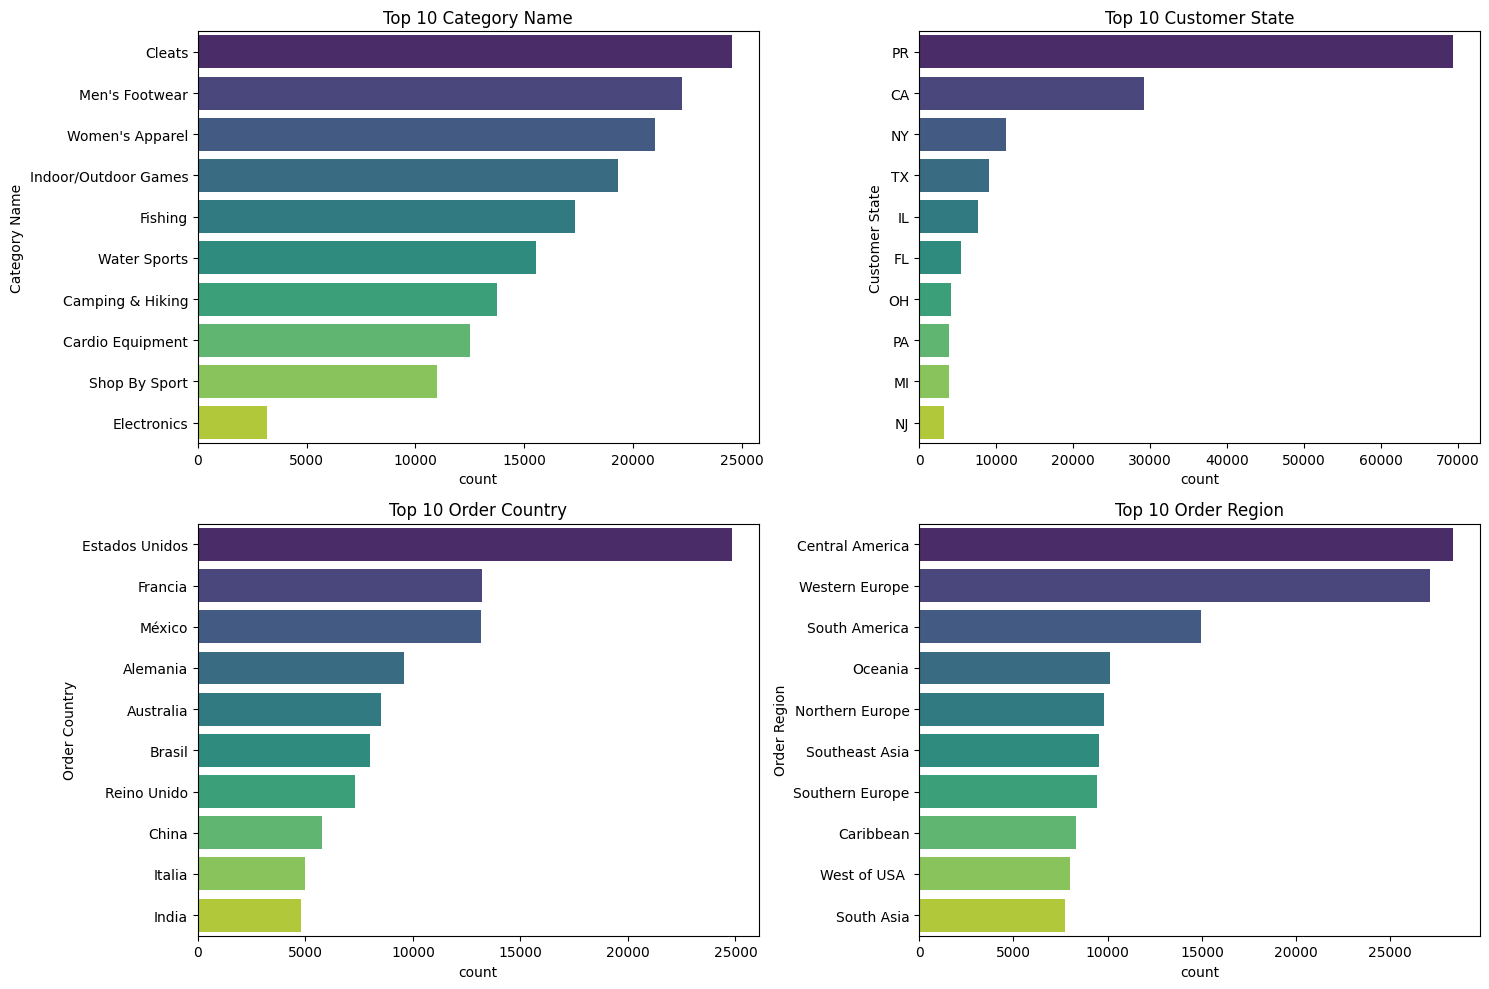

In [27]:
# Select the categorical columns that have more than 10 distinct values
categorical_data2 = df[['Category Name', 'Customer State', 'Order Country', 'Order Region']]

num_cols = categorical_data2.shape[1]
n_rows = (num_cols // 2) + (num_cols % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))
for idx, col in enumerate(categorical_data2.columns):
    plt.subplot(n_rows, 2, idx + 1)
    category_counts = categorical_data2[col].value_counts().head(10)
    sns.barplot(x=category_counts, y=category_counts.index, palette="viridis")
    plt.title(f'Top 10 {col}')
    plt.tight_layout()

plt.show()

#### Sales Trend Analysis

Monthly & Annually Sales Trend

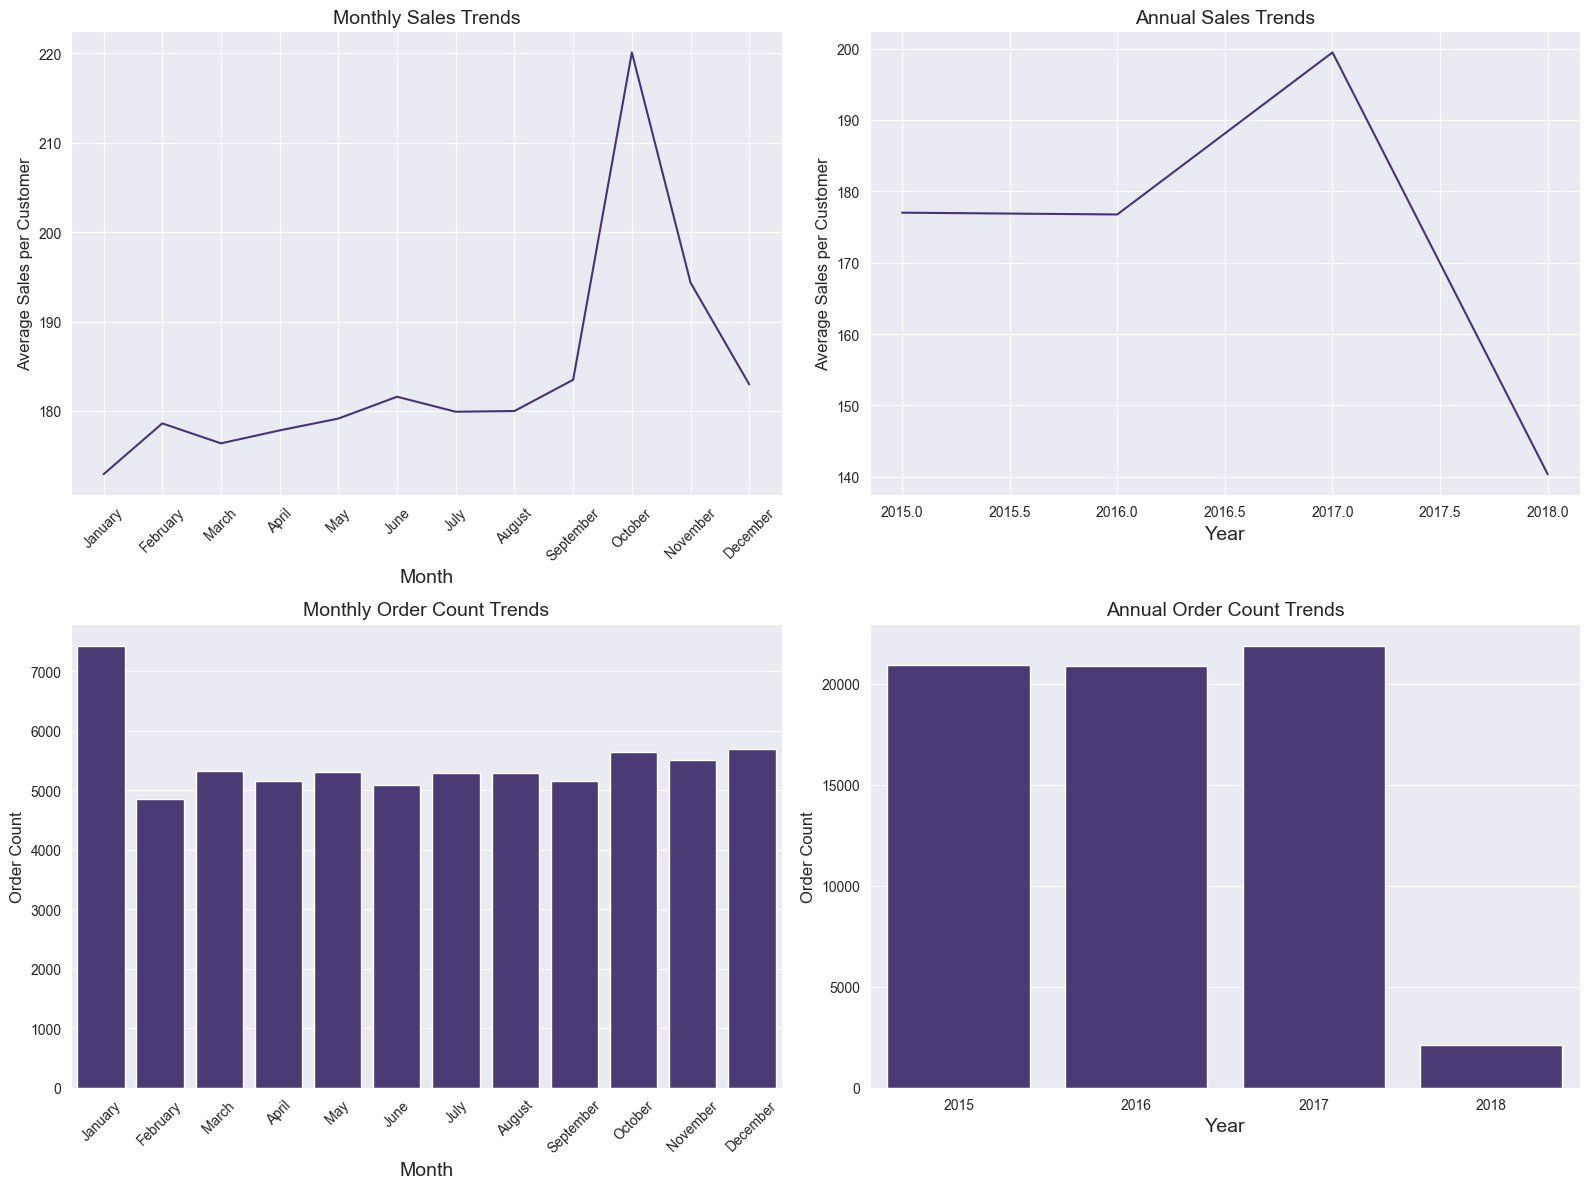

In [28]:
months_in_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                   'July', 'August', 'September', 'October', 'November', 'December']
df['MonthName'] = df['order date (DateOrders)'].dt.month_name()
df['MonthName'] = pd.Categorical(df['MonthName'], categories=months_in_order, ordered=True)

monthly_sales = df.groupby('MonthName')['Sales per customer'].mean()
yearly_sales = df.groupby('Year')['Sales per customer'].mean()

monthly_order_count = df.groupby('MonthName')['Order Id'].nunique()
yearly_order_count = df.groupby('Year')['Order Id'].nunique()

sns.set_palette("viridis")
sns.set_style("darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(16, 12))

# Monthly sales trends
sns.lineplot(data=monthly_sales, ax=axs[0, 0])
axs[0, 0].set_title('Monthly Sales Trends', fontsize=14)
axs[0, 0].set_xlabel('Month', fontsize=14)
axs[0, 0].set_ylabel('Average Sales per Customer', fontsize=12)
axs[0, 0].set_xticklabels(months_in_order, rotation=45)

# Annual sales trends
sns.lineplot(data=yearly_sales, ax=axs[0, 1])
axs[0, 1].set_title('Annual Sales Trends', fontsize=14)
axs[0, 1].set_xlabel('Year', fontsize=14)
axs[0, 1].set_ylabel('Average Sales per Customer', fontsize=12)

# Monthly order count trends
sns.barplot(x=monthly_order_count.index, y=monthly_order_count.values, ax=axs[1, 0])
axs[1, 0].set_title('Monthly Order Count Trends', fontsize=14)
axs[1, 0].set_xlabel('Month', fontsize=14)
axs[1, 0].set_ylabel('Order Count', fontsize=12)
axs[1, 0].set_xticklabels(months_in_order, rotation=45)

# Annual order count trends
sns.barplot(x=yearly_order_count.index, y=yearly_order_count.values, ax=axs[1, 1])
axs[1, 1].set_title('Annual Order Count Trends', fontsize=14)
axs[1, 1].set_xlabel('Year', fontsize=14)
axs[1, 1].set_ylabel('Order Count', fontsize=12)

plt.tight_layout()
plt.show()

Monthly Sales & Profit Ratio & Discount Rate Average Trend

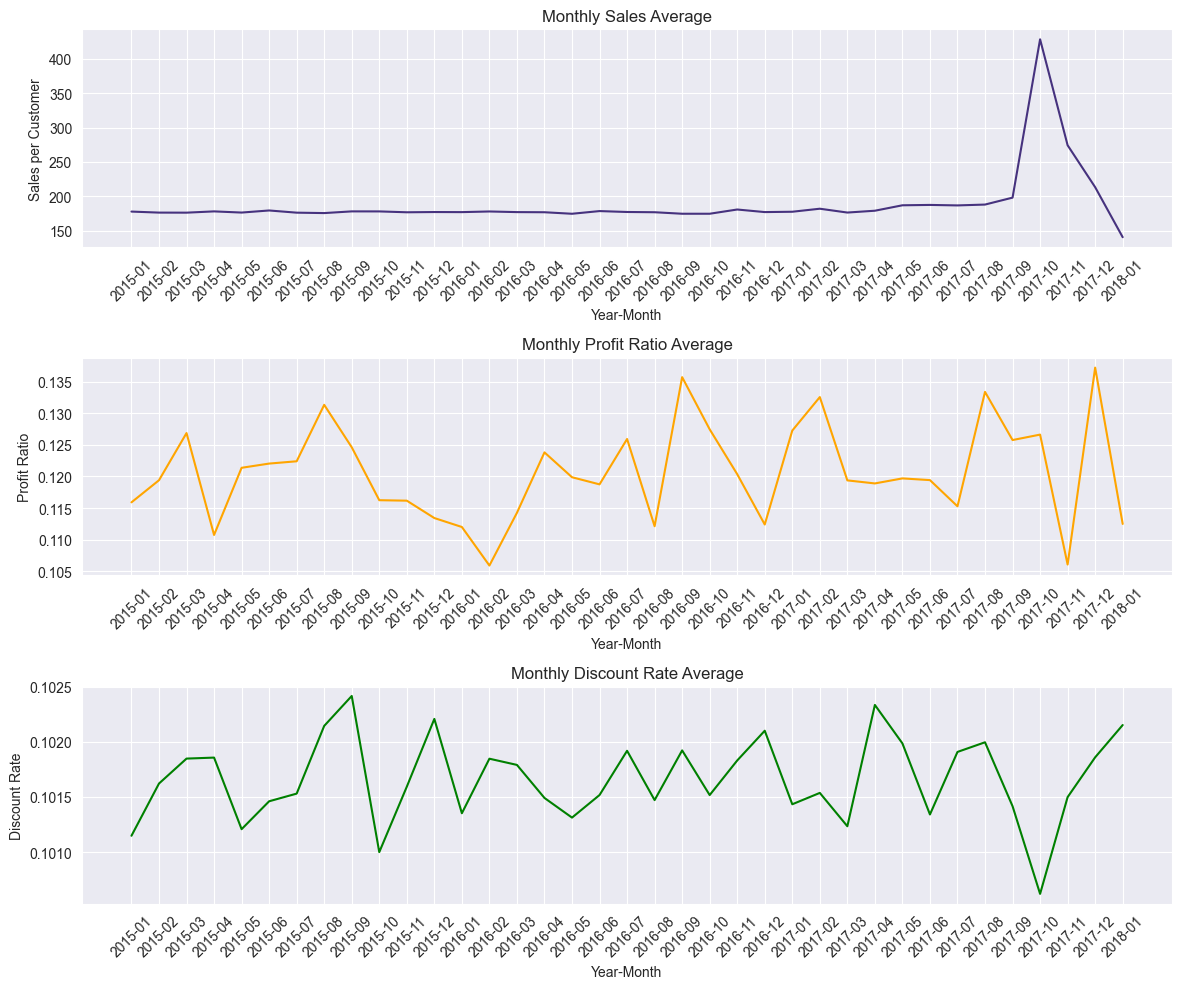

In [29]:
monthly_sales_avg = df.groupby('YearMonth')['Sales per customer'].mean()
monthly_profit_ratio_avg = df.groupby('YearMonth')['Order Item Profit Ratio'].mean()
monthly_discount_rate_avg = df.groupby('YearMonth')['Order Item Discount Rate'].mean()

fig, axes = plt.subplots(3, 1, figsize=(12, 10)) 

# Plot Monthly Sales Average
sns.lineplot(ax=axes[0], x=monthly_sales_avg.index, y=monthly_sales_avg)
axes[0].set_title('Monthly Sales Average')
axes[0].set_xlabel('Year-Month')
axes[0].set_ylabel('Sales per Customer')
axes[0].tick_params(axis='x', rotation=45)

# Plot Monthly Profit Ratio Average
sns.lineplot(ax=axes[1], x=monthly_profit_ratio_avg.index, y=monthly_profit_ratio_avg, color='orange')
axes[1].set_title('Monthly Profit Ratio Average')
axes[1].set_xlabel('Year-Month')
axes[1].set_ylabel('Profit Ratio')
axes[1].tick_params(axis='x', rotation=45)

# Plot Monthly Order Item Discount Rate Average
sns.lineplot(ax=axes[2], x=monthly_discount_rate_avg.index, y=monthly_discount_rate_avg, color='green')
axes[2].set_title('Monthly Discount Rate Average')
axes[2].set_xlabel('Year-Month')
axes[2].set_ylabel('Discount Rate')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

OLS Regression Report (for Total Profit Per Order)

In [30]:
df['Total Profit Per Order'] = df['Order Profit Per Order']*df['Order Item Quantity']
X = df[['Order Item Discount Rate', 'Product Price', 'Order Item Quantity']]
y = df['Total Profit Per Order']  
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     Total Profit Per Order   R-squared:                       0.026
Model:                                OLS   Adj. R-squared:                  0.026
Method:                     Least Squares   F-statistic:                     1597.
Date:                    Wed, 05 Nov 2025   Prob (F-statistic):               0.00
Time:                            13:48:47   Log-Likelihood:            -1.2704e+06
No. Observations:                  180519   AIC:                         2.541e+06
Df Residuals:                      180515   BIC:                         2.541e+06
Df Model:                               3                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

Multiple Numerical Features Analysis

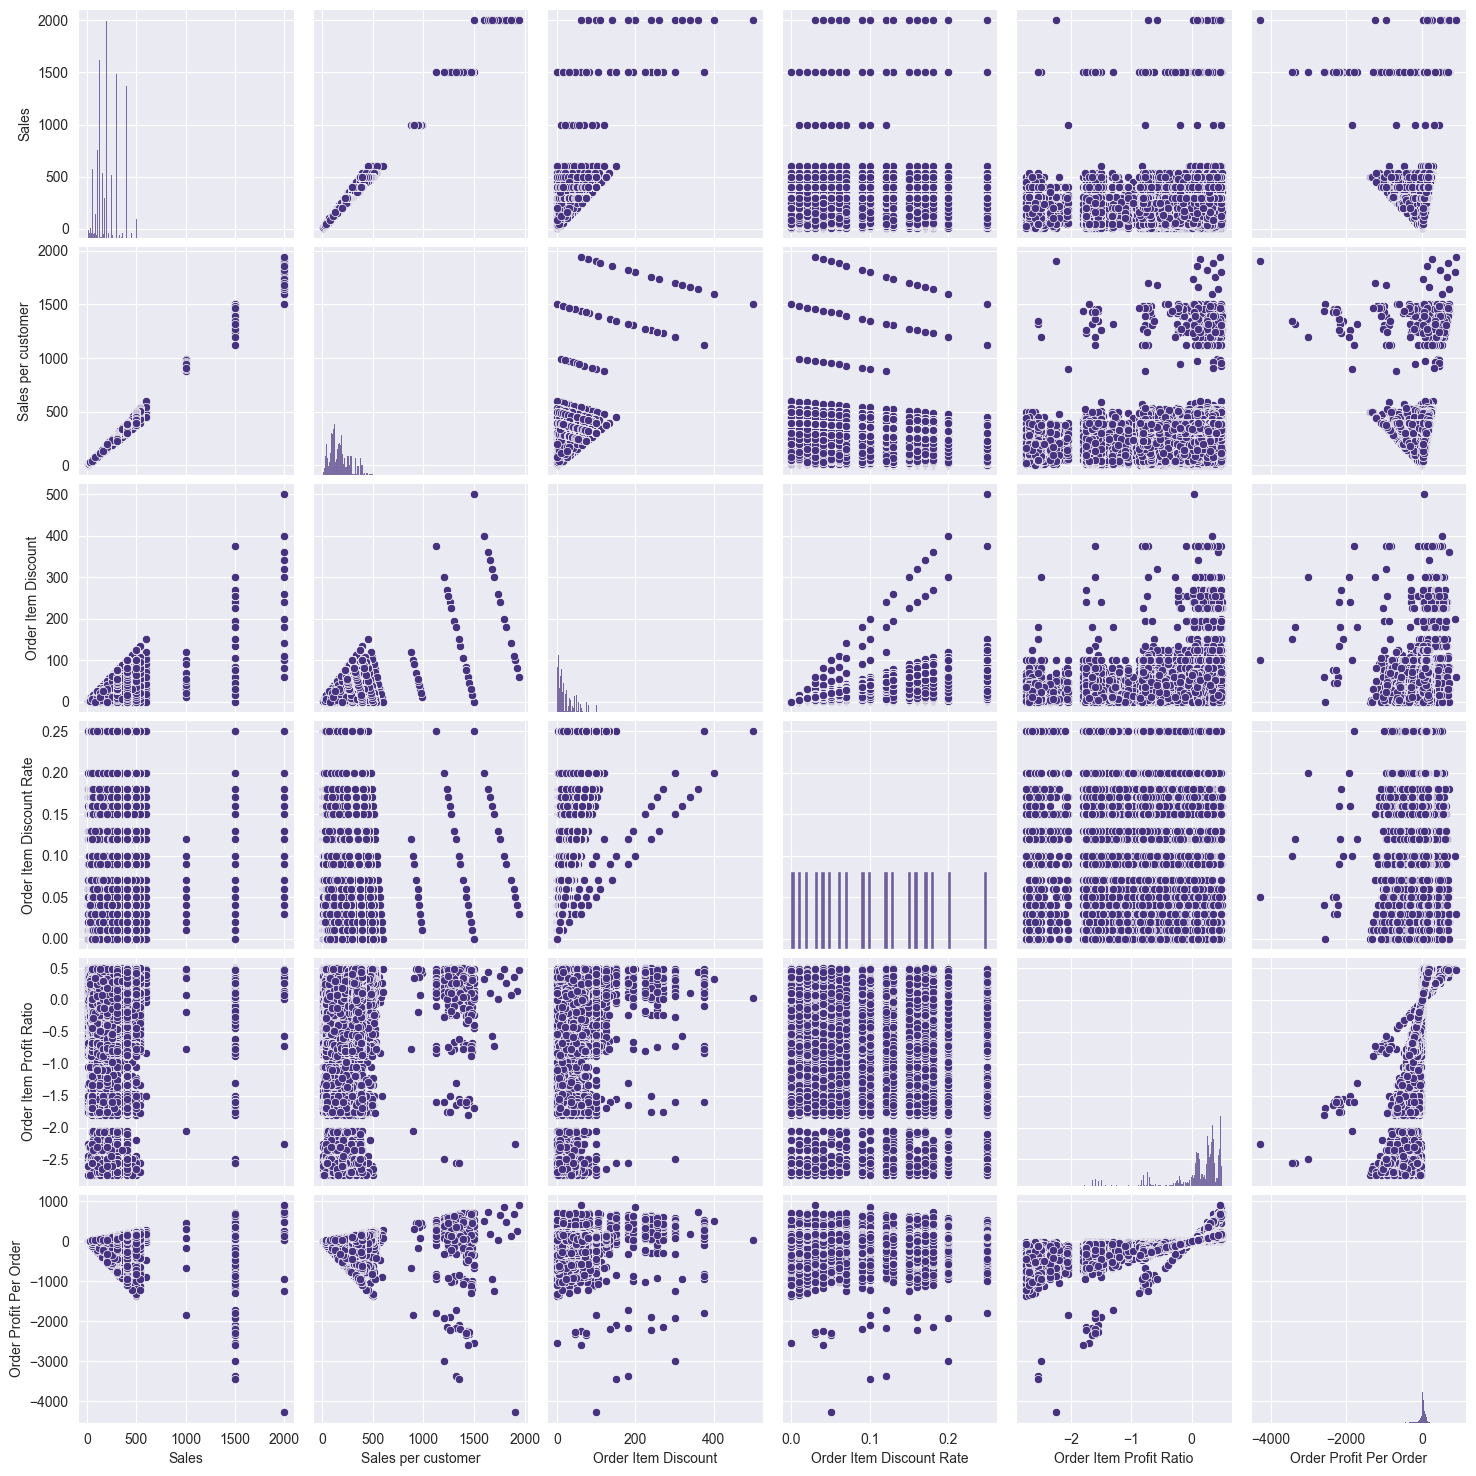

In [31]:
numerical_cols = ['Sales', 'Sales per customer', 'Order Item Discount', 'Order Item Discount Rate', 
                   'Order Item Profit Ratio', 'Order Profit Per Order' ]
df_selected = df[numerical_cols]
sns.pairplot(df_selected)
plt.show()

#### Fraud Order Analysis

Order Status Distribution

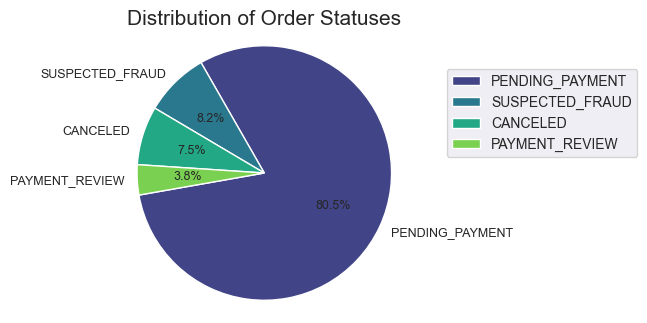

In [32]:
sns.set_palette("viridis")
sns.set_style("darkgrid")

relevant_statuses = ['SUSPECTED_FRAUD', 'CANCELED', 'COMPLETED', 'PENDING_PAYMENT', 'PAYMENT_REVIEW']
df_filtered = df[df['Order Status'].isin(relevant_statuses)]

status_counts = df_filtered['Order Status'].value_counts()
colors = sns.color_palette("viridis", len(status_counts))

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%', startangle=190)

for text in texts + autotexts:
    text.set_fontsize(9)

plt.title('Distribution of Order Statuses', fontsize=15)
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.legend(fontsize=10, bbox_to_anchor=(0.7,0.4), loc="center right", bbox_transform=plt.gcf().transFigure) 
plt.subplots_adjust(top=0.5, left=0.0, bottom=0.15, right=0.45)
plt.show()

Fraud v.s. Non-Fraud on Categorical Features

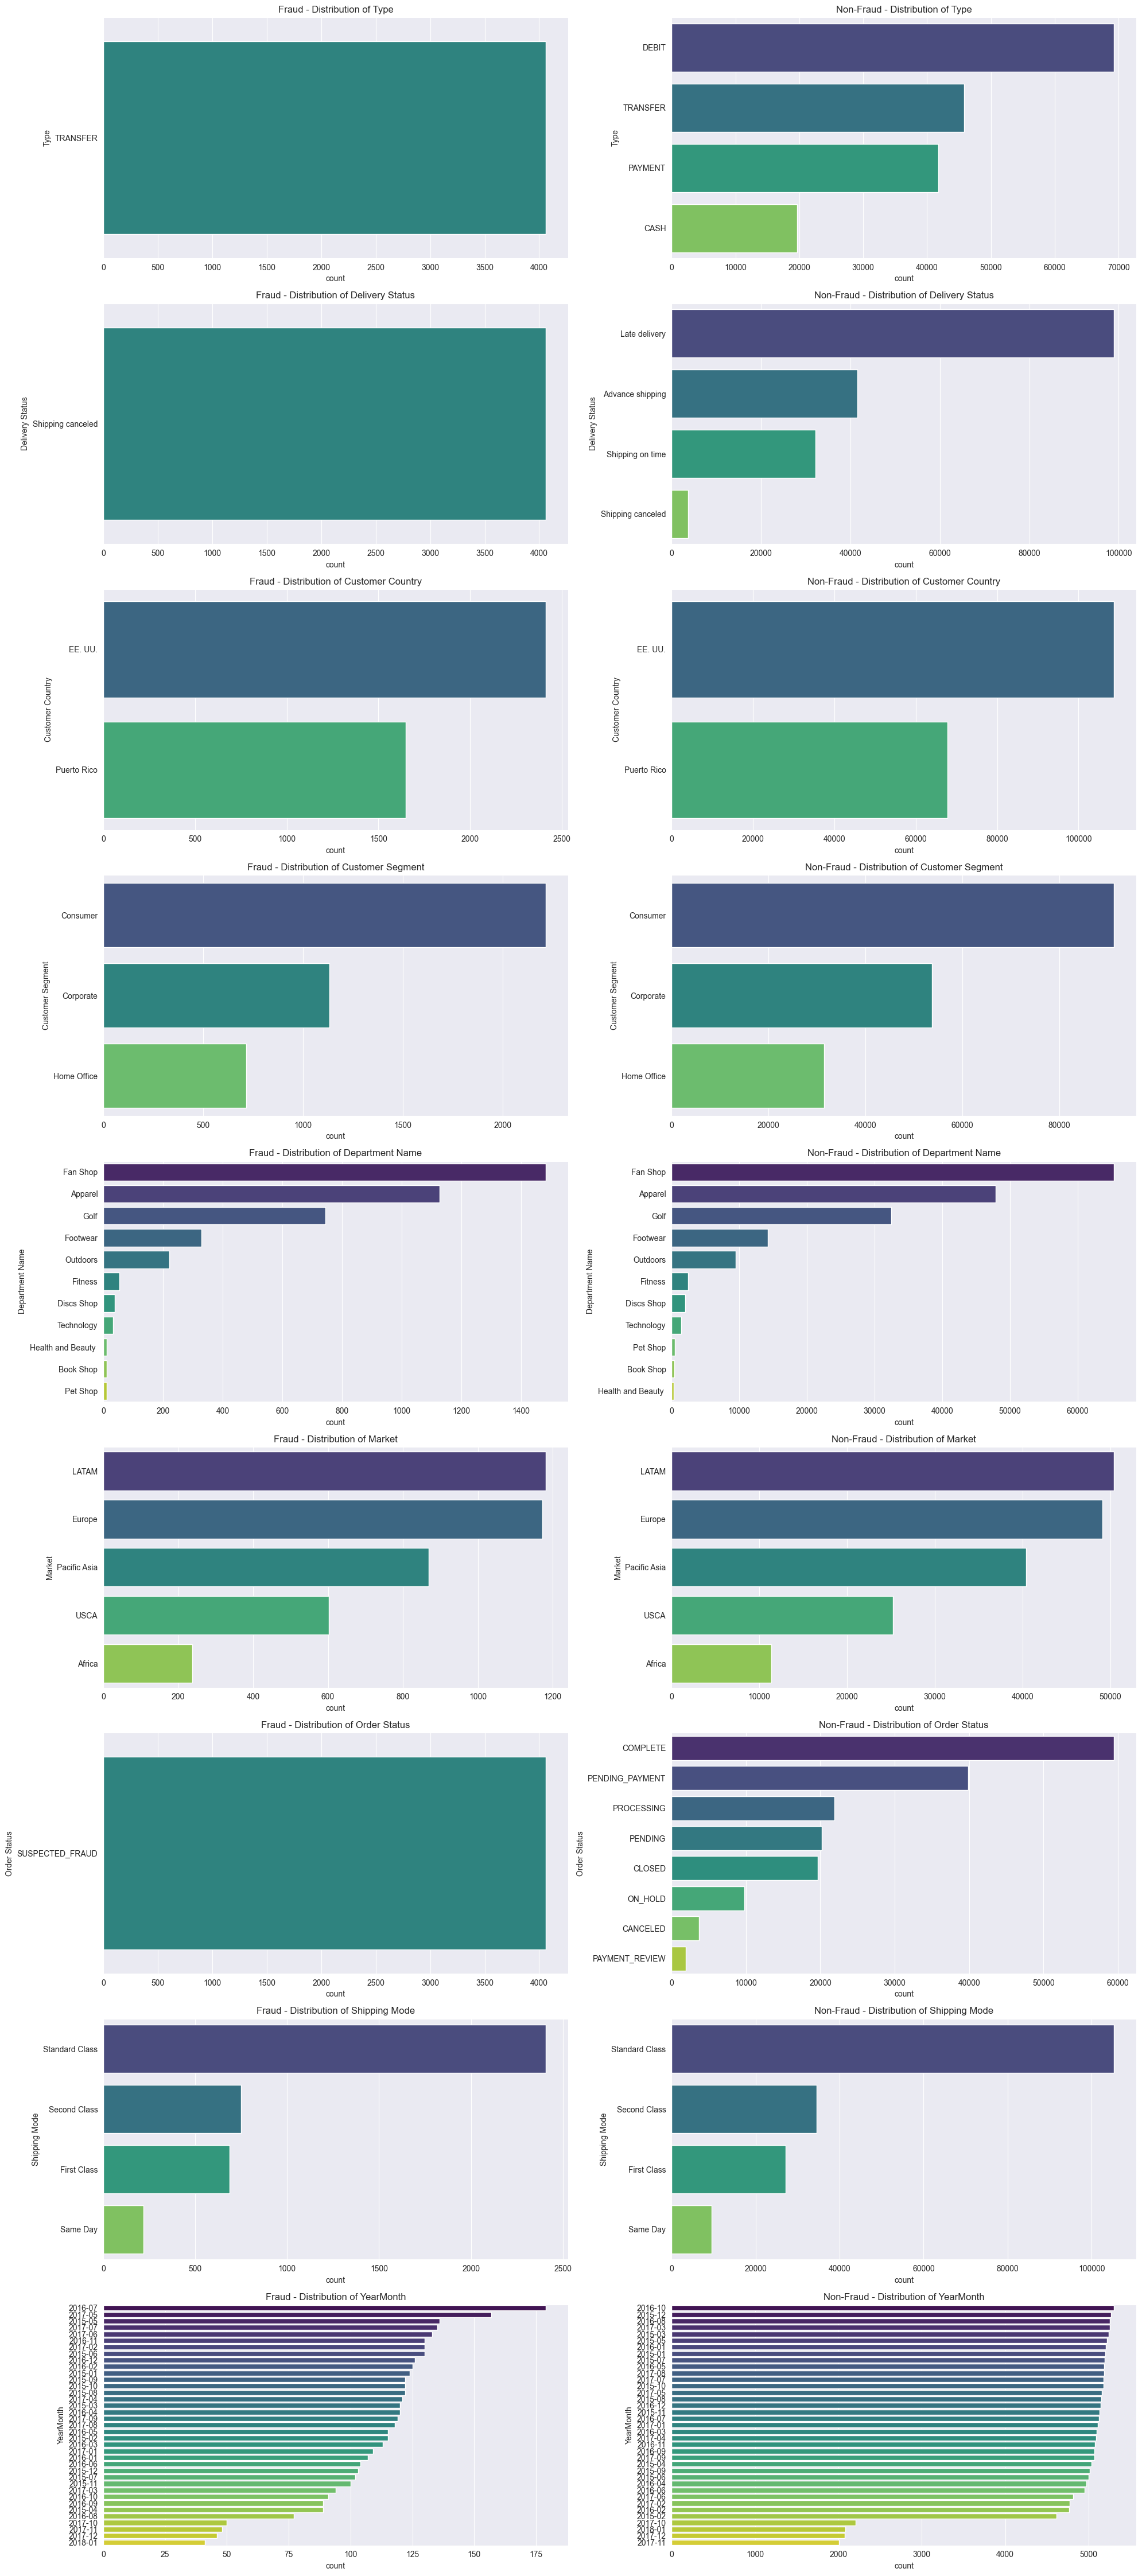

In [33]:
fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']
non_fraud_df = df[df['Order Status'] != 'SUSPECTED_FRAUD']

num_cols = 2  
n_rows = len(categorical_data.columns)

fig, axs = plt.subplots(n_rows, num_cols, figsize=(20, 5 * n_rows))

for idx, col in enumerate(categorical_data.columns):
    # Plot for fraudulent orders
    sns.countplot(y=fraud_df[col], order=fraud_df[col].value_counts().index, ax=axs[idx, 0], palette="viridis")
    axs[idx, 0].set_title(f'Fraud - Distribution of {col}')

    # Plot for non-fraudulent orders
    sns.countplot(y=non_fraud_df[col], order=non_fraud_df[col].value_counts().index, ax=axs[idx, 1], palette="viridis")
    axs[idx, 1].set_title(f'Non-Fraud - Distribution of {col}')

plt.tight_layout()
plt.show()

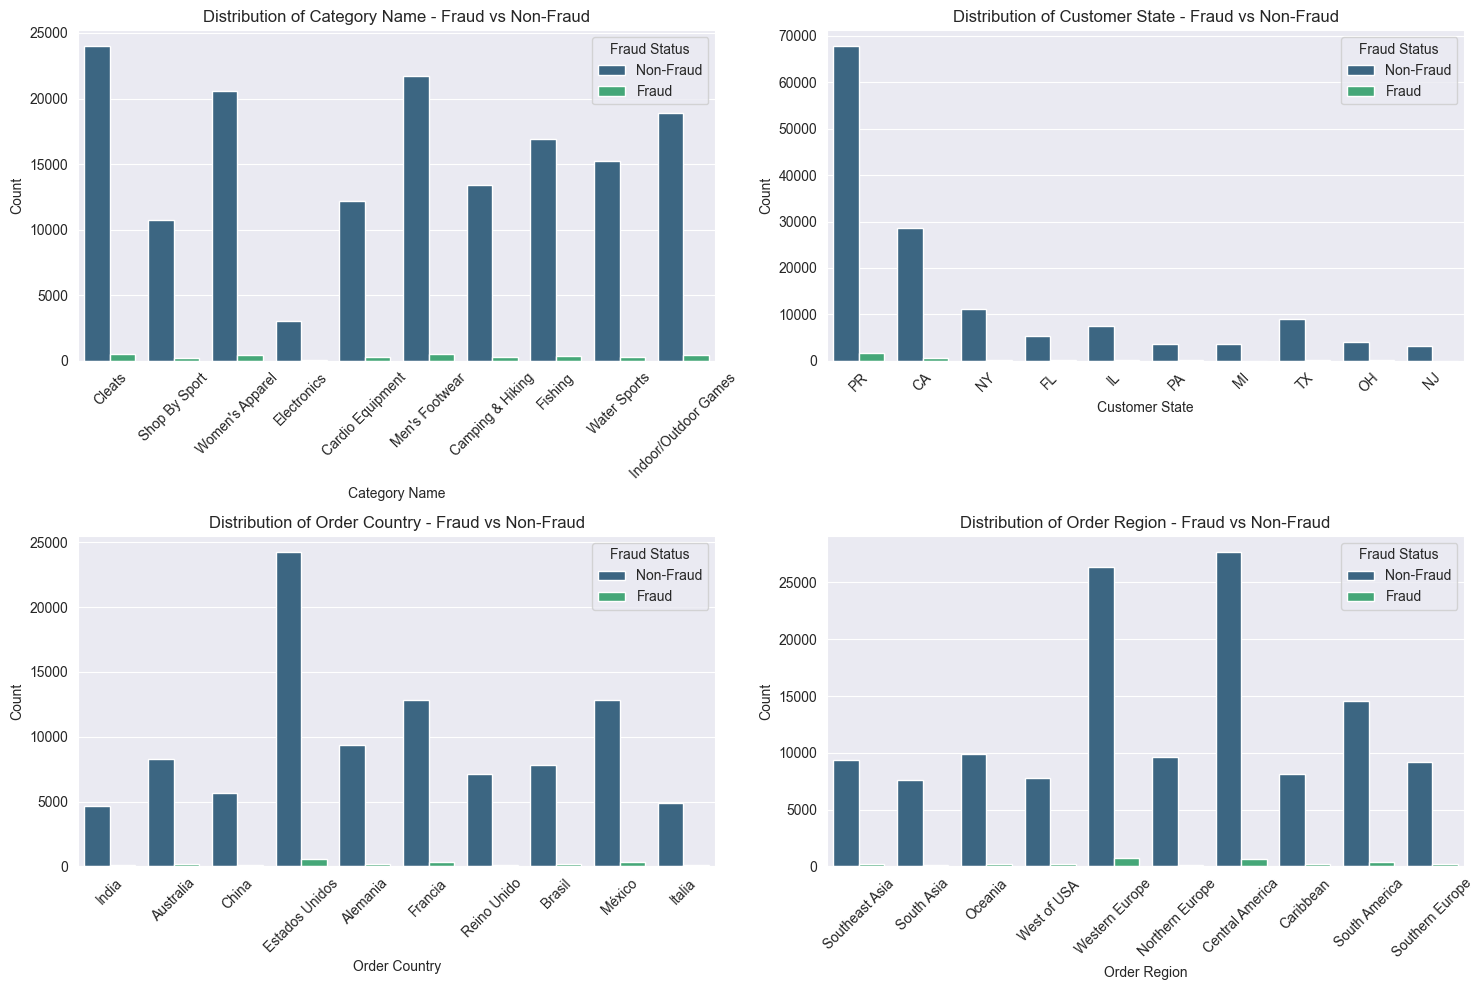

In [34]:
selected_categorical_columns = ['Category Name', 'Customer State', 'Order Country', 'Order Region']

df['Fraud Status'] = df['Order Status'].apply(lambda x: 'Fraud' if x == 'SUSPECTED_FRAUD' else 'Non-Fraud')

fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for idx, col in enumerate(selected_categorical_columns):
    # Filter to top 10 categories for readability
    top_categories = df[col].value_counts().head(10).index
    filtered_data = df[df[col].isin(top_categories)]
    
    sns.countplot(data=filtered_data, x=col, hue='Fraud Status', ax=axs[idx], palette="viridis")
    axs[idx].set_title(f'Distribution of {col} - Fraud vs Non-Fraud')
    axs[idx].set_xlabel(col)
    axs[idx].set_ylabel('Count')
    axs[idx].legend(title='Fraud Status')
    axs[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Fraud v.s. Non-Fraud on Numerical Features

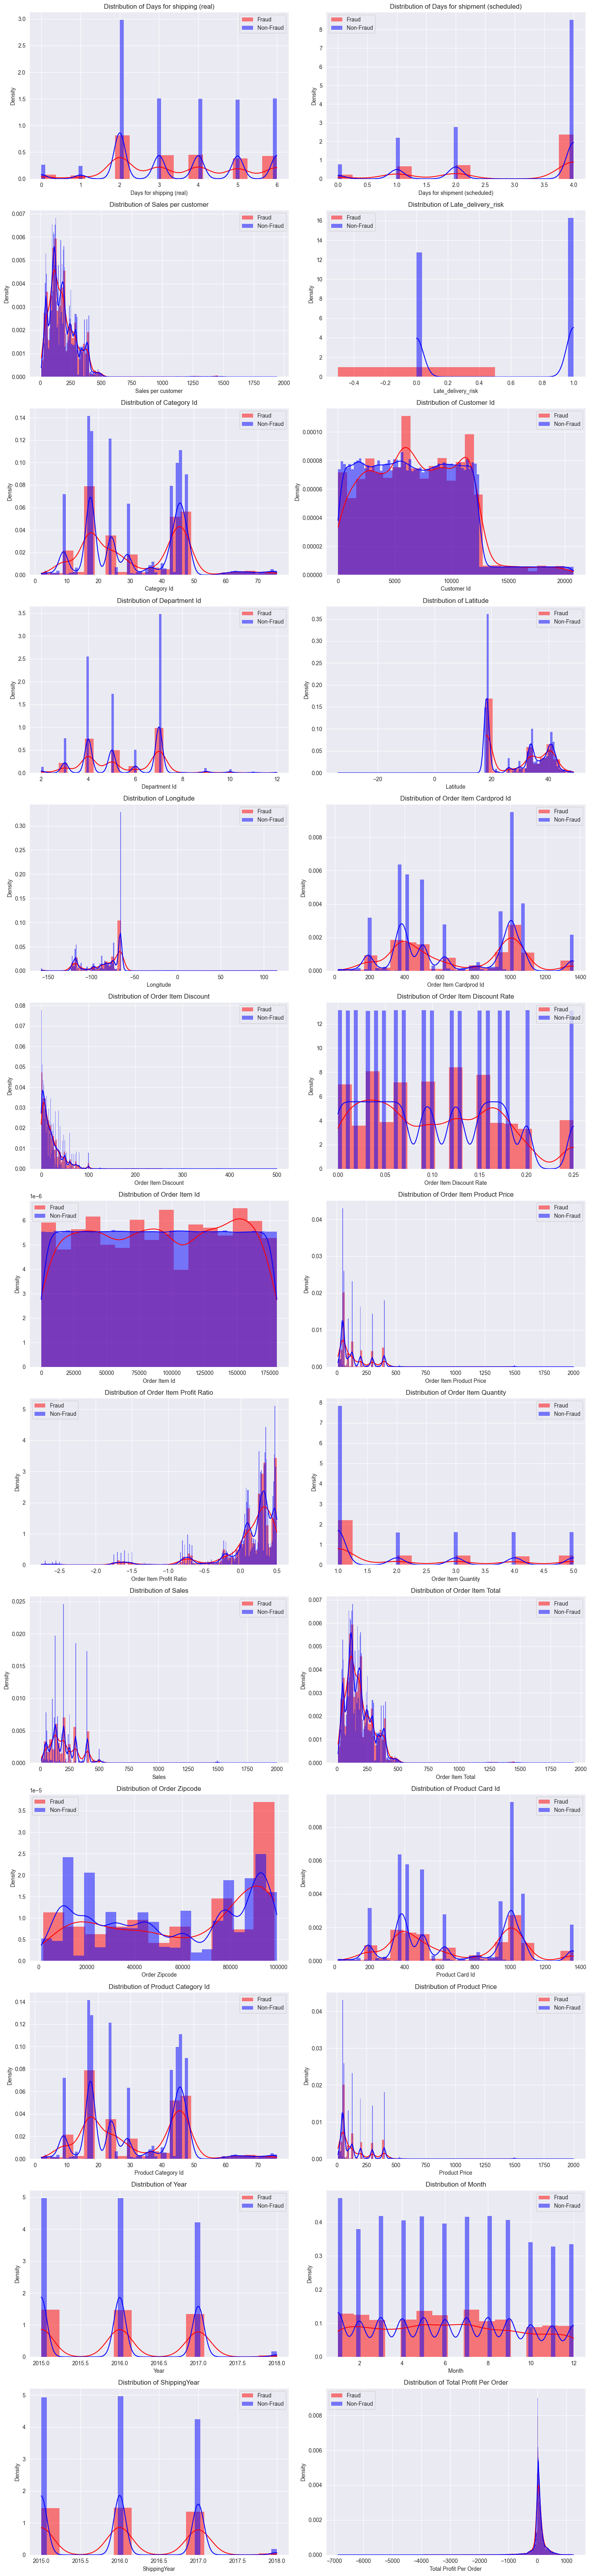

In [35]:
fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']
non_fraud_df = df[df['Order Status'] != 'SUSPECTED_FRAUD']

numerical_columns = fraud_df.select_dtypes(include=[np.number])\
                    .drop(columns=['Product Status', 'Order Profit Per Order', 'Benefit per order'
                                  , 'Order Id', 'Order Customer Id']).columns

n_rows = (len(numerical_columns) // 2) + (len(numerical_columns) % 2 > 0)

plt.figure(figsize=(15, 5 * n_rows))

for idx, col in enumerate(numerical_columns):
    plt.subplot(n_rows, 2, idx + 1)
    sns.histplot(fraud_df[col], color='red', label='Fraud', kde=True, stat="density", linewidth=0)
    sns.histplot(non_fraud_df[col], color='blue', label='Non-Fraud', kde=True, stat="density", linewidth=0)
    plt.legend()
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

Fraud Trend per Month & per Year

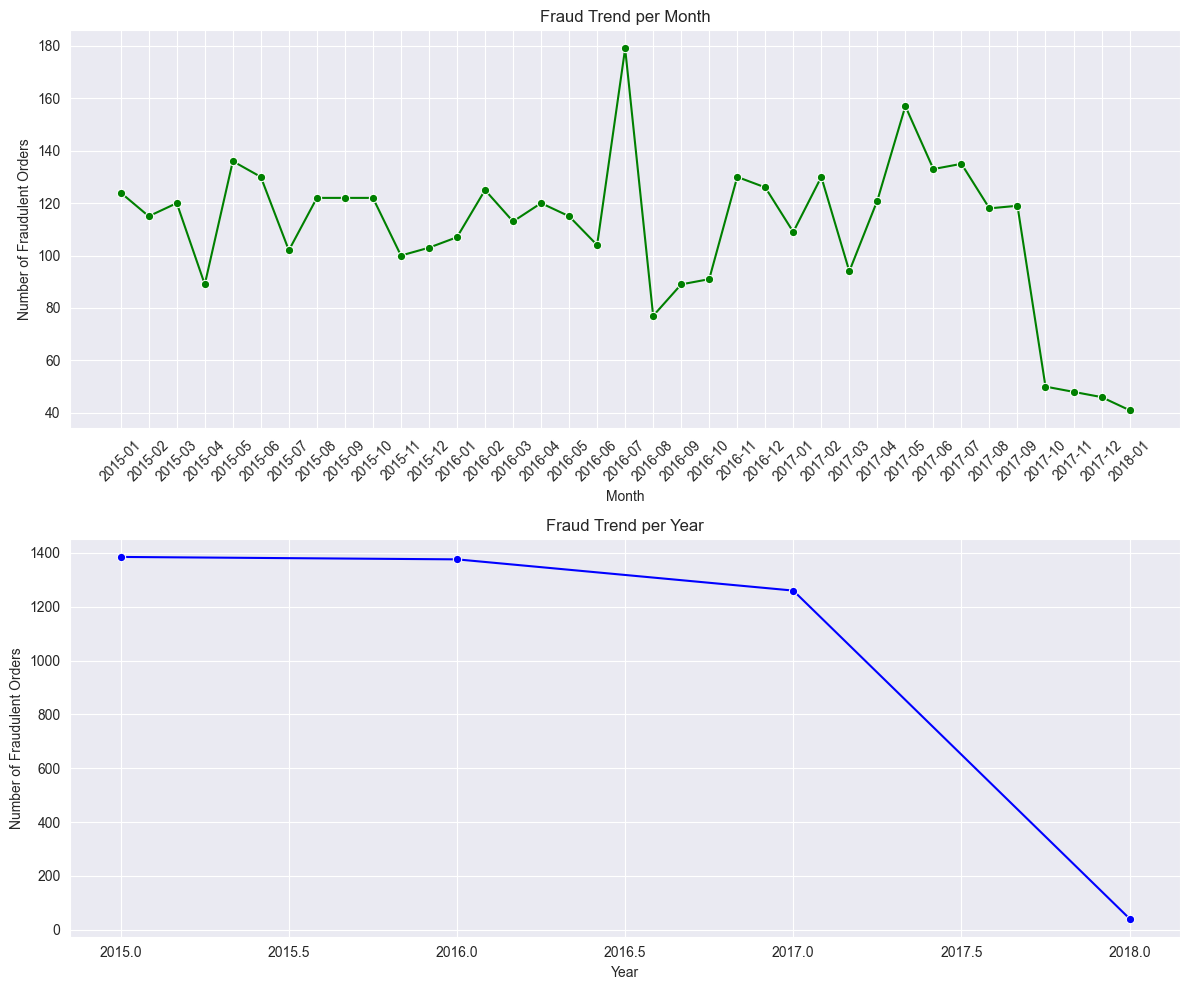

In [36]:
fraud_df = df[df['Order Status'] == 'SUSPECTED_FRAUD']

monthly_fraud_trend = fraud_df.groupby('YearMonth').size()
yearly_fraud_trend = fraud_df.groupby('Year').size()

fig, axs = plt.subplots(2, 1, figsize=(12, 10))

# Plot the monthly fraud trend
sns.lineplot(x=monthly_fraud_trend.index, y=monthly_fraud_trend.values, ax=axs[0], marker='o', color='green')
axs[0].set_title('Fraud Trend per Month')
axs[0].set_xlabel('Month')
axs[0].set_ylabel('Number of Fraudulent Orders')
axs[0].tick_params(axis='x', rotation=45)

# Plot the yearly fraud trend
sns.lineplot(x=yearly_fraud_trend.index, y=yearly_fraud_trend.values, ax=axs[1], marker='o', color='blue')
axs[1].set_title('Fraud Trend per Year')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Number of Fraudulent Orders')

plt.tight_layout()
plt.show()

Top 10 Customers by Fraud & Cancellation Count

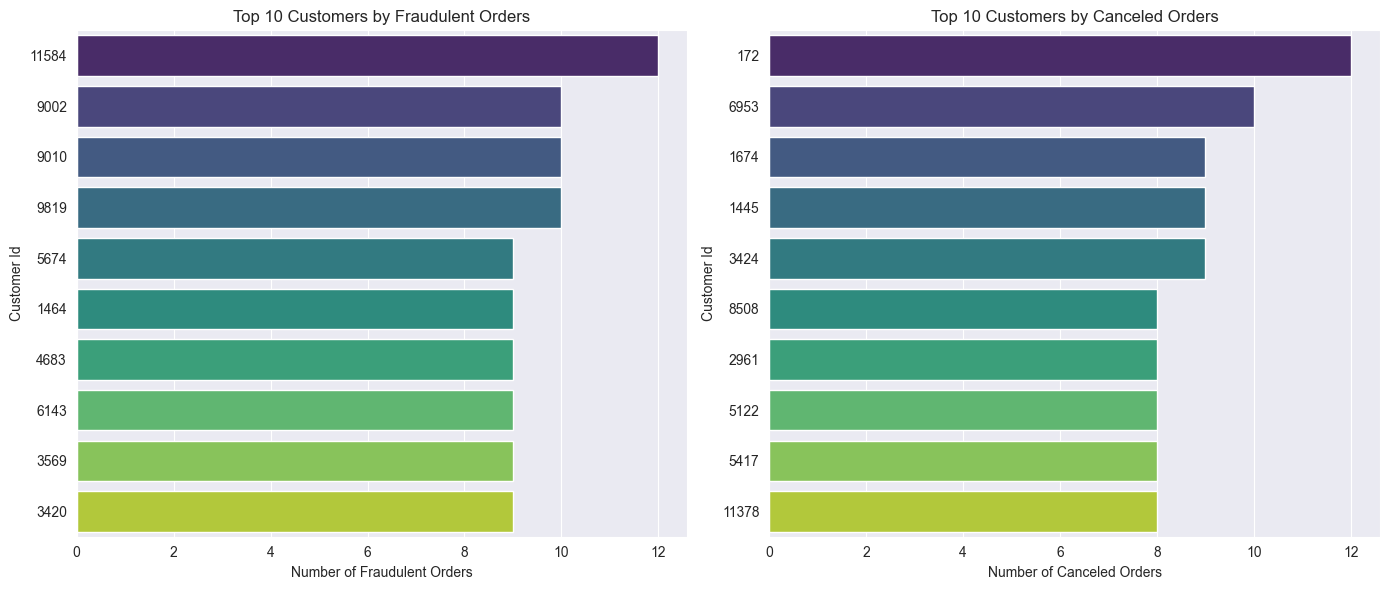

In [37]:
fraud_orders = df[df['Order Status'] == 'SUSPECTED_FRAUD']
canceled_orders = df[df['Order Status'] == 'CANCELED']

top_fraud_customers = fraud_orders['Customer Id'].value_counts().nlargest(10)
top_canceled_customers = canceled_orders['Customer Id'].value_counts().nlargest(10)

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot for top 10 customers with fraudulent orders
sns.barplot(y=top_fraud_customers.index.astype(str), x=top_fraud_customers.values, ax=axs[0], palette="viridis", ci=None)
axs[0].set_title('Top 10 Customers by Fraudulent Orders')
axs[0].set_ylabel('Customer Id')
axs[0].set_xlabel('Number of Fraudulent Orders')

# Plot for top 10 customers with canceled orders
sns.barplot(y=top_canceled_customers.index.astype(str), x=top_canceled_customers.values, ax=axs[1], palette="viridis", ci=None)
axs[1].set_title('Top 10 Customers by Canceled Orders')
axs[1].set_ylabel('Customer Id')
axs[1].set_xlabel('Number of Canceled Orders')

plt.tight_layout()
plt.show()

#### Geographical Analysis

In [38]:
order_subset.head()

Order Customer Id order date (DateOrders)  Order Id  \
0              20755     2018-01-31 22:56:00     77202   
1              19492     2018-01-13 12:27:00     75939   
2              19491     2018-01-13 12:06:00     75938   
3              19490     2018-01-13 11:45:00     75937   
4              19489     2018-01-13 11:24:00     75936   

   Order Item Cardprod Id  Order Item Discount  Order Item Discount Rate  \
0                    1360            13.110000                      0.04   
1                    1360            16.389999                      0.05   
2                    1360            18.030001                      0.06   
3                    1360            22.940001                      0.07   
4                    1360            29.500000                      0.09   

   Order Item Id  Order Item Product Price  Order Item Profit Ratio  \
0         180517                    327.75                     0.29   
1         179254                    327.75                    -0.80   
2         179253                    327.75                    -0.80   
3         179252                    327.75                     0.08   
4         179251                    327.75                     0.45   

   Order Item Quantity   Sales  Order Item Total  Order Profit Per Order  \
0                    1  327.75        314.640015               91.250000   
1                    1  327.75        311.359985             -249.089996   
2                    1  327.75        309.720001             -247.779999   
3                    1  327.75        304.809998               22.860001   
4                    1  327.75        298.250000              134.210007   

     Order Region      Order State     Order Status order_YearMonth  
0  Southeast Asia  Java Occidental         COMPLETE         2018-01  
1      South Asia         Rajastán          PENDING         2018-01  
2      South Asia         Rajastán           CLOSED         2018-01  
3         Oceania       Queensland         COMPLETE         2018-01  
4         Oceania       Queensland  PENDING_PAYMENT         2018-01

In [39]:
order_region_grouped = order_subset.groupby(['Order Region'])['Order Id'].count().reset_index()
order_region_grouped = order_region_grouped.rename(columns = {'Order Id': 'Order Counts'})
order_region_grouped

Order Region  Order Counts
0            Canada           959
1         Caribbean          8318
2    Central Africa          1677
3   Central America         28341
4      Central Asia           553
5       East Africa          1852
6       East of USA          6915
7      Eastern Asia          7280
8    Eastern Europe          3920
9      North Africa          3232
10  Northern Europe          9792
11          Oceania         10148
12    South America         14935
13       South Asia          7731
14   South of  USA           4045
15   Southeast Asia          9539
16  Southern Africa          1157
17  Southern Europe          9431
18       US Center           5887
19      West Africa          3696
20        West Asia          6009
21     West of USA           7993
22   Western Europe         27109

In [40]:
order_subset['Order State'].value_counts().head(10)

Order State
Inglaterra                     6722
California                     4966
Isla de Francia                4580
Renania del Norte-Westfalia    3303
San Salvador                   3055
Nueva York                     2753
Distrito Federal               2559
Texas                          2446
Nueva Gales del Sur            2370
Santo Domingo                  2211
Name: count, dtype: int64

In [41]:
region_mapping = {
    'Central America': 'Central America',
    'Western Europe': 'Europe',
    'South America': 'South America',
    'Oceania': 'Oceania',
    'Northern Europe': 'Europe',
    'Southeast Asia': 'Asia',
    'Southern Europe': 'Europe',
    'Caribbean': 'North America',
    'West of USA': 'North America',
    'South Asia': 'Asia',
    'Eastern Asia': 'Asia',
    'East of USA': 'North America',
    'West Asia': 'Asia',
    'US Center': 'North America',
    'South of USA': 'North America',
    'Eastern Europe': 'Europe',
    'West Africa': 'Africa',
    'North Africa': 'Africa',
    'East Africa': 'Africa',
    'Central Africa': 'Africa',
    'Southern Africa': 'Africa',
    'Canada': 'North America',
    'Central Asia': 'Asia'
}

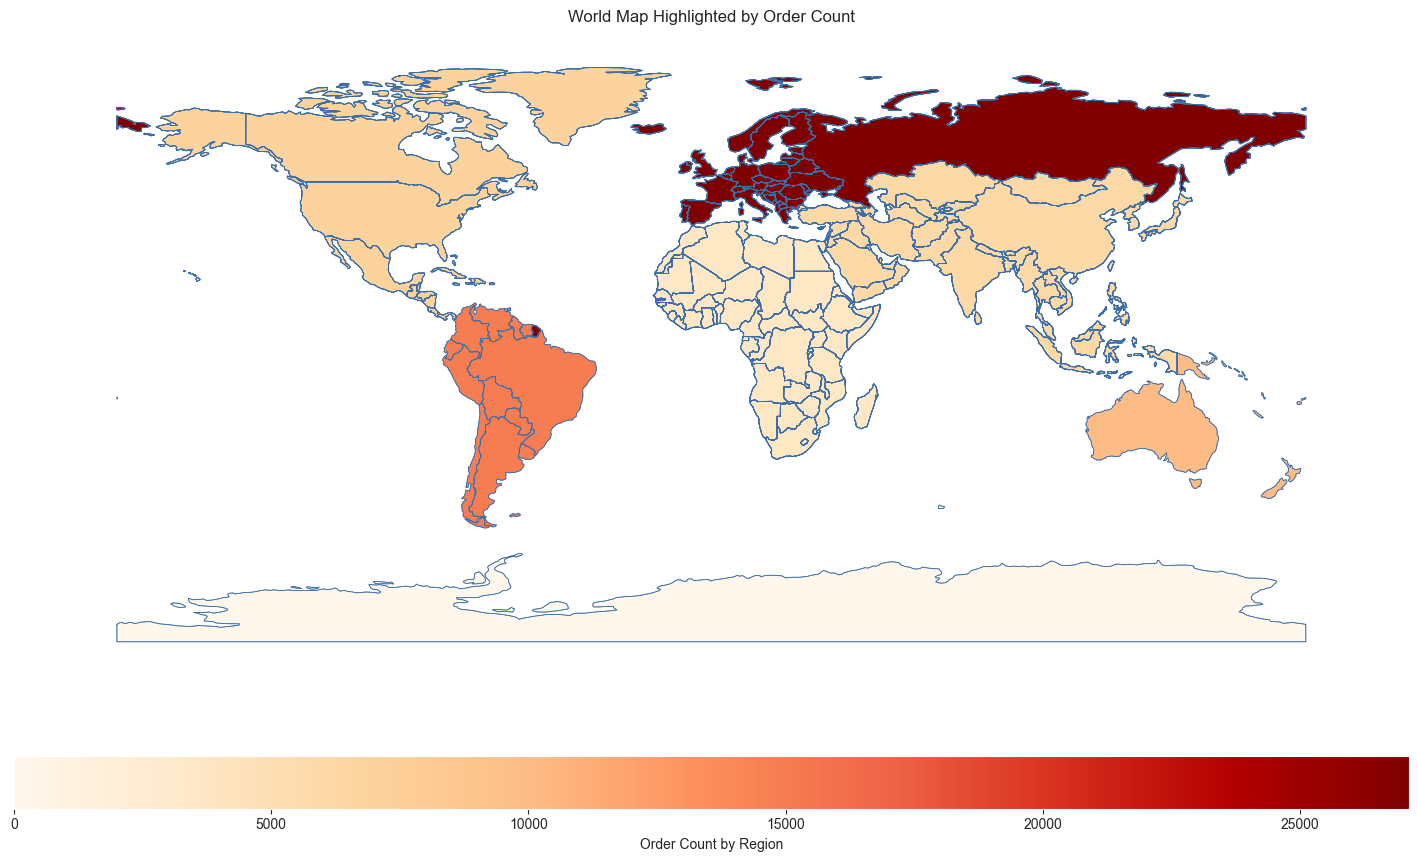

In [42]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl

# Load Natural Earth: Admin 0 – Countries (replaces the removed sample dataset)
url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(url).to_crs(4326).rename(columns={
    "ADMIN": "name",
    "ADM0_A3": "iso_a3",
    "CONTINENT": "continent",
})

# Your data prep
# order_region_grouped must have columns: ['Order Region', 'Order Counts']
# region_mapping must map your business regions -> Natural Earth 'continent' values
order_region_grouped['mapped_region'] = order_region_grouped['Order Region'].map(region_mapping)

# Merge on continent (keep geometry!)
world_mapped = world.merge(order_region_grouped,
                           left_on='continent', right_on='mapped_region', how='left')

# Fill missing counts with 0
world_mapped['Order Counts'] = world_mapped['Order Counts'].fillna(0)

# Plot: map on top, big horizontal colorbar below (like your image)
fig = plt.figure(figsize=(18, 10))
gs = fig.add_gridspec(nrows=2, ncols=1, height_ratios=[12, 1], hspace=0.25)
ax = fig.add_subplot(gs[0, 0])
cax = fig.add_subplot(gs[1, 0])

# Style
edge_blue = "#3b6ea8"
cmap = "OrRd"

# Robust normalization (handles all-equal data)
vmin = float(world_mapped['Order Counts'].min())
vmax = float(world_mapped['Order Counts'].max())
if vmin == vmax:
    vmin, vmax = 0, vmax if vmax > 0 else 1

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Draw boundaries first for crisp outlines
world_mapped.boundary.plot(ax=ax, linewidth=0.6, edgecolor=edge_blue)

# Choropleth
world_mapped.plot(
    ax=ax,
    column='Order Counts',
    cmap=cmap,
    norm=norm,
    edgecolor=edge_blue,
    linewidth=0.4,
    missing_kwds={"color": "#f0e4cc", "edgecolor": edge_blue, "label": "No data"}
)

ax.set_title('World Map Highlighted by Order Count', pad=12)
ax.set_axis_off()

# Horizontal colorbar (separate axis)
sm = mpl.cm.ScalarMappable(norm=norm, cmap=cmap)
sm._A = []  # deprecated but harmless; avoids warning in some matplotlib versions
cb = fig.colorbar(sm, cax=cax, orientation='horizontal')
cb.set_label('Order Count by Region')

plt.tight_layout()
plt.show()
